In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
actionNames = ['up','right','left','down']

In [3]:
# set up file folders
fearPath = os.path.join('/Users/byrdsmyth/Documents/School/Thesis/Stimuli/', 'fearImages')
if not os.path.exists(fearPath):
    os.makedirs(fearPath)
ppPath = os.path.join('/Users/byrdsmyth/Documents/School/Thesis/Stimuli/', 'ppImages')
if not os.path.exists(ppPath):
    os.makedirs(ppPath)
normalPath = os.path.join('/Users/byrdsmyth/Documents/School/Thesis/Stimuli/', 'normalImages')
if not os.path.exists(normalPath):
    os.makedirs(normalPath)
standardPath = os.path.join('/Users/byrdsmyth/Documents/School/Thesis/Stimuli/', 'stdScoreImages')
if not os.path.exists(standardPath):
    os.makedirs(standardPath)
PlsInGmPath = os.path.join('/Users/byrdsmyth/Documents/School/Thesis/Stimuli/', 'stdScoreImages')
if not os.path.exists(PlsInGmPath):
    os.makedirs(PlsInGmPath)
folderList = [fearPath, ppPath, normalPath, standardPath, PlsInGmPath]

In [5]:
# load in first agent's info
dfFear = pd.read_parquet('/Volumes/Britt_SSD/Singularity/EvaluationsSlimmed/FearGhostsEvalDB.parquet')
dfFear = dfFear.drop(columns=dfFear.columns[0])
# load in second agent's info
dfPP = pd.read_parquet('/Volumes/Britt_SSD/Singularity/EvaluationsSlimmed/PowerPillsOnlyEvalDB.parquet')
dfPP = dfPP.drop(columns=dfPP.columns[0])
# load in third agent's info
dfNormal = pd.read_parquet('/Volumes/Britt_SSD/Singularity/EvaluationsSlimmed/NormalPillsOnlyEvalDB.parquet')
dfNormal = dfNormal.drop(columns=dfNormal.columns[0])
# load in fourth agent's info
dfStd = pd.read_parquet('/Volumes/Britt_SSD/Singularity/EvaluationsSlimmed/StandardEvalDB.parquet')
dfStd = dfStd.drop(columns=dfStd.columns[0])
# load in fifth agent's info
dfPlsInGm = pd.read_parquet('/Volumes/Britt_SSD/Singularity/EvaluationsSlimmed/NmlPillsInGameEvalDB.parquet')
dfPlsInGm = dfPlsInGm.drop(columns=dfPlsInGm.columns[0])


In [6]:
agentList = [dfFear, dfPP, dfNormal, dfStd, dfPlsInGm]

In [8]:
dfPlsInGm.head(1)

action_name  action  reward  episode reward  epoch reward  total reward  \
0        LEFT       3     0.0            10.0          10.0          10.0   

   lives  end of episode  end of epoch  episode  ...  action 4 total sum  \
0      3           False         False        1  ...                   0   

                                          q_values_x  \
0  [ 0.5345721  -0.38067085 -0.30953303 -0.358668...   

                                         observation  \
0  [[[[  0   0   0]\n   [  0   0   0]\n   [  0   ...   

                                              argmax  \
0  [[[0.00000000e+00 0.00000000e+00 0.00000000e+0...   

                                          q_values_y  importance  \
0  [-0.18220752  0.1347398  -1.5751286   0.299656...    0.068118   

                                            features  epoch_score  key_state  \
0  [0.34509804 0.34509804 0.34509804 0.34509804 0...            0      False   

   context_state  
0          False  

[1 rows x 34 columns]

In [9]:
# And pull out the key and context states of each
key_statesFear = dfFear[dfFear.key_state.eq(True) | dfFear.context_state.eq(True)]
key_statesPP = dfPP[dfPP.key_state.eq(True) | dfPP.context_state.eq(True)]
key_statesNormal = dfNormal[dfNormal.key_state.eq(True) | dfNormal.context_state.eq(True)]
key_statesStandard = dfStd[dfStd.key_state.eq(True) | dfStd.context_state.eq(True)]
key_statesPlsInGm = dfPlsInGm[dfPlsInGm.key_state.eq(True) | dfPlsInGm.context_state.eq(True)]


In [12]:
# make versions without the numpy arrays
key_statesNormalSlimmed = key_statesNormal.drop(columns=['q_values_x','observation','argmax','q_values_y','features'])
key_statesPPSlimmed = key_statesPP.drop(columns=['q_values_x','observation','argmax','q_values_y','features'])
key_statesFearSlimmed = key_statesFear.drop(columns=['q_values_x','observation','argmax','q_values_y','features'])
key_statesStandardSlimmed = key_statesStandard.drop(columns=['q_values_x','observation','argmax','q_values_y','features'])
key_statesPlsInGmSlimmed = key_statesPlsInGm.drop(columns=['q_values_x','observation','argmax','q_values_y','features'])


In [13]:
# And add column which numbers the key state in question
key_statesPlsInGmSlimmed['tempKeyNum'] = key_statesPlsInGmSlimmed.groupby([key_statesPlsInGmSlimmed.state, key_statesPlsInGmSlimmed.state.diff().ne(1).cumsum()])
key_statesPlsInGmSlimmed['tempKeyNum2'], temp2 = zip(*key_statesPlsInGmSlimmed['tempKeyNum'])
temp2, key_statesPlsInGmSlimmed['keyNum'] = zip(*key_statesPlsInGmSlimmed['tempKeyNum2'])
key_statesPlsInGmSlimmed = key_statesPlsInGmSlimmed.drop(columns=['tempKeyNum','tempKeyNum2'])
print(key_statesPlsInGmSlimmed)



     action_name  action  reward  episode reward  epoch reward  total reward  \
430         LEFT       3    10.0            50.0          50.0         240.0   
431        RIGHT       2     0.0            50.0          50.0         240.0   
432           UP       1     0.0            50.0          50.0         240.0   
433         LEFT       3     0.0            50.0          50.0         240.0   
434        RIGHT       2     0.0            50.0          50.0         240.0   
...          ...     ...     ...             ...           ...           ...   
9359        DOWN       4     0.0            70.0         140.0        4850.0   
9360        LEFT       3     0.0            70.0         140.0        4850.0   
9361          UP       1     0.0            70.0         140.0        4850.0   
9362        LEFT       3     0.0            70.0         140.0        4850.0   
9363        DOWN       4     0.0            70.0         140.0        4850.0   

      lives  end of episode  end of epo

In [14]:
# And add column which numbers the key state in question
key_statesStandardSlimmed['tempKeyNum'] = key_statesStandardSlimmed.groupby([key_statesStandardSlimmed.state, key_statesStandardSlimmed.state.diff().ne(1).cumsum()])
key_statesStandardSlimmed['tempKeyNum2'], temp2 = zip(*key_statesStandardSlimmed['tempKeyNum'])
temp2, key_statesStandardSlimmed['keyNum'] = zip(*key_statesStandardSlimmed['tempKeyNum2'])
key_statesStandardSlimmed = key_statesStandardSlimmed.drop(columns=['tempKeyNum','tempKeyNum2'])
print(key_statesStandardSlimmed)


     action_name  action  reward  episode reward  epoch reward  total reward  \
874           UP       1     0.0            30.0         220.0         510.0   
875         DOWN       4     0.0            30.0         220.0         510.0   
876        RIGHT       2     0.0            30.0         220.0         510.0   
877         DOWN       4    10.0            40.0         230.0         520.0   
878         LEFT       3     0.0            40.0         230.0         520.0   
...          ...     ...     ...             ...           ...           ...   
9988          UP       1     0.0            70.0         190.0        6120.0   
9989          UP       1     0.0            70.0         190.0        6120.0   
9990        LEFT       3     0.0            70.0         190.0        6120.0   
9991        LEFT       3    10.0            80.0         200.0        6130.0   
9992          UP       1     0.0            80.0         200.0        6130.0   

      lives  end of episode  end of epo

In [15]:

# And add column which numbers the key state in question
key_statesNormalSlimmed['tempKeyNum'] = key_statesNormalSlimmed.groupby([key_statesNormalSlimmed.state, key_statesNormalSlimmed.state.diff().ne(1).cumsum()])
key_statesNormalSlimmed['tempKeyNum2'], temp2 = zip(*key_statesNormalSlimmed['tempKeyNum'])
temp2, key_statesNormalSlimmed['keyNum'] = zip(*key_statesNormalSlimmed['tempKeyNum2'])
key_statesNormalSlimmed = key_statesNormalSlimmed.drop(columns=['tempKeyNum','tempKeyNum2'])
print(key_statesNormalSlimmed)


     action_name  action  reward  episode reward  epoch reward  total reward  \
2351          UP       1     0.0            80.0          80.0        1280.0   
2352          UP       1     0.0            80.0          80.0        1280.0   
2353       RIGHT       2     0.0            80.0          80.0        1280.0   
2354        DOWN       4     0.0            80.0          80.0        1280.0   
2355       RIGHT       2     0.0            80.0          80.0        1280.0   
...          ...     ...     ...             ...           ...           ...   
7014       RIGHT       2     0.0            50.0         150.0        3900.0   
7015        DOWN       4     0.0            50.0         150.0        3900.0   
7016       RIGHT       2     0.0            50.0         150.0        3900.0   
7017        LEFT       3     0.0            50.0         150.0        3900.0   
7018          UP       1     0.0            50.0         150.0        3900.0   

      lives  end of episode  end of epo

In [16]:
# And add column which numbers the key state in question
key_statesPPSlimmed['tempKeyNum'] = key_statesPPSlimmed.groupby([key_statesPPSlimmed.state, key_statesPPSlimmed.state.diff().ne(1).cumsum()])
key_statesPPSlimmed['tempKeyNum2'], temp2 = zip(*key_statesPPSlimmed['tempKeyNum'])
temp2, key_statesPPSlimmed['keyNum'] = zip(*key_statesPPSlimmed['tempKeyNum2'])
key_statesPPSlimmed = key_statesPPSlimmed.drop(columns=['tempKeyNum','tempKeyNum2'])
print(key_statesPPSlimmed)


     action_name  action  reward  episode reward  epoch reward  total reward  \
2362        DOWN       4     0.0            30.0         170.0        1090.0   
2363          UP       1     0.0            30.0         170.0        1090.0   
2364        LEFT       3     0.0            30.0         170.0        1090.0   
2365          UP       1     0.0            30.0         170.0        1090.0   
2366       RIGHT       2     0.0            30.0         170.0        1090.0   
...          ...     ...     ...             ...           ...           ...   
9703        LEFT       3     0.0            70.0         270.0        5190.0   
9704          UP       1     0.0            70.0         270.0        5190.0   
9705          UP       1     0.0            70.0         270.0        5190.0   
9706        DOWN       4     0.0            70.0         270.0        5190.0   
9707       RIGHT       2     0.0            70.0         270.0        5190.0   

      lives  end of episode  end of epo

In [17]:
# And add column which numbers the key state in question
key_statesFearSlimmed['tempKeyNum'] = key_statesFearSlimmed.groupby([key_statesFearSlimmed.state, key_statesFearSlimmed.state.diff().ne(1).cumsum()])
key_statesFearSlimmed['tempKeyNum2'], temp2 = zip(*key_statesFearSlimmed['tempKeyNum'])
temp2, key_statesFearSlimmed['keyNum'] = zip(*key_statesFearSlimmed['tempKeyNum2'])
key_statesFearSlimmed = key_statesFearSlimmed.drop(columns=['tempKeyNum','tempKeyNum2'])
print(key_statesFearSlimmed)


     action_name  action  reward  episode reward  epoch reward  total reward  \
1145        DOWN       4     0.0             0.0         190.0         710.0   
1146       RIGHT       2     0.0             0.0         190.0         710.0   
1147       RIGHT       2     0.0             0.0         190.0         710.0   
1148        LEFT       3     0.0             0.0         190.0         710.0   
1149        DOWN       4     0.0             0.0         190.0         710.0   
...          ...     ...     ...             ...           ...           ...   
9748        LEFT       3     0.0            10.0         200.0        5010.0   
9749          UP       1     0.0            10.0         200.0        5010.0   
9750          UP       1     0.0            10.0         200.0        5010.0   
9751          UP       1     0.0            10.0         200.0        5010.0   
9752        LEFT       3     0.0            10.0         200.0        5010.0   

      lives  end of episode  end of epo

In [18]:
agentKeyStates = [key_statesFearSlimmed,key_statesPPSlimmed,key_statesNormalSlimmed, 
                  key_statesStandardSlimmed, key_statesPlsInGmSlimmed]
agentKeyNames = ['fear','pp','normal', 'standard','inGamePills']

In [23]:
fivePreviousFear = pd.DataFrame()
fivePreviousPP = pd.DataFrame()
fivePreviousNormal = pd.DataFrame()
fivePreviousStandard = pd.DataFrame()
fivePreviousInGamePills = pd.DataFrame()
agentKeyDeaths = [fivePreviousFear, fivePreviousPP, fivePreviousNormal, fivePreviousStandard, fivePreviousInGamePills]
# Create dfs of the five frames preceding life loss in each key state for each agent
for index, agent in enumerate(agentKeyStates):
    agent.rename(columns={"end of episode": "end_of_episode"}, inplace=True)
    agent.columns
    idx = agent.index.get_indexer_for(agent[agent.end_of_episode==True].index)
    n=5
    agentKeyDeaths[index] = agent.iloc[np.unique(np.concatenate([np.arange(max(i-n,0), min(i+n-4, len(agent)))
                                            for i in idx]))]

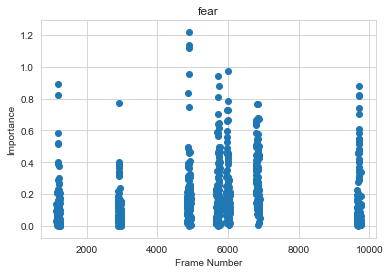

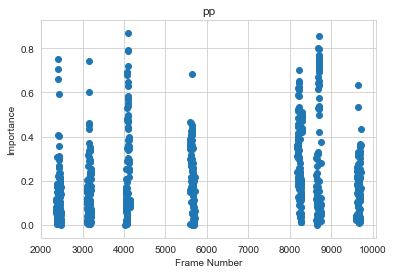

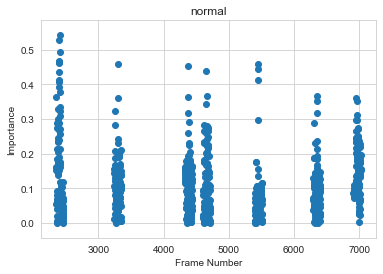

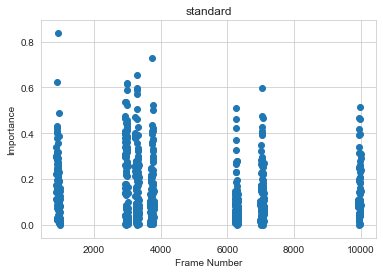

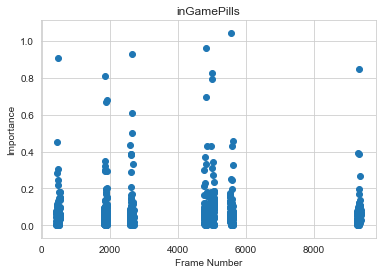

In [24]:
for index, agent in enumerate(agentKeyStates):
    plt.scatter("state", "importance", data = agent)
    plt.xlabel('Frame Number')
    plt.ylabel('Importance')
    plt.title(agentKeyNames[index])
    
    plt.show()

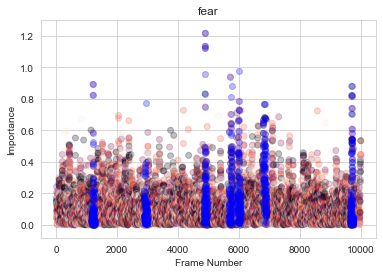

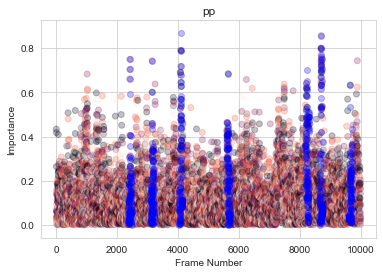

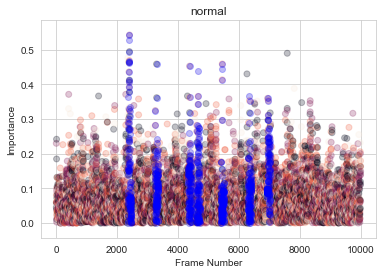

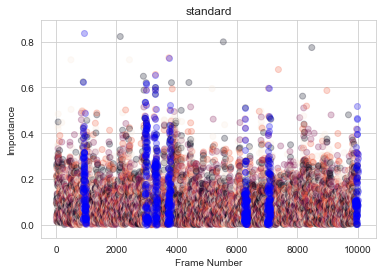

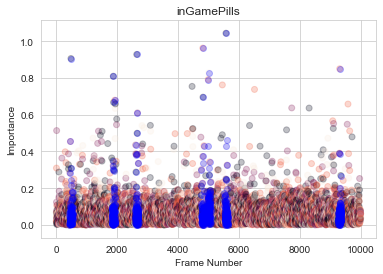

In [25]:
for index, agent in enumerate(agentList):
    plt.scatter("state", "importance", data = agent, c = "action", alpha = 0.25)
    plt.scatter("state", "importance", data = agentKeyStates[index], c = "b", alpha = 0.25)
    plt.xlabel('Frame Number')
    plt.ylabel('Importance')
    plt.title(agentKeyNames[index])
    
    plt.show()

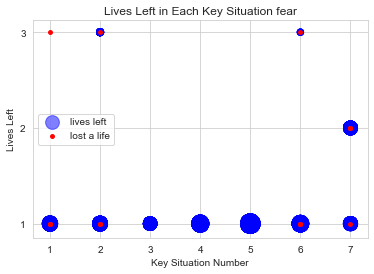

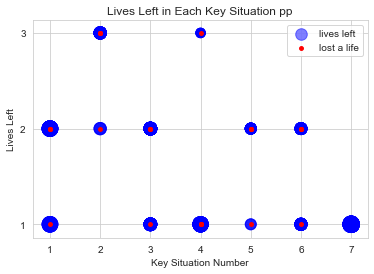

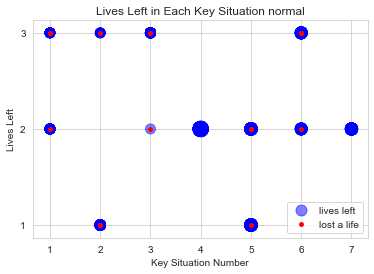

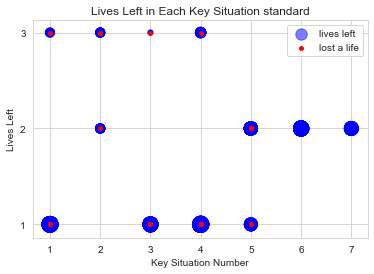

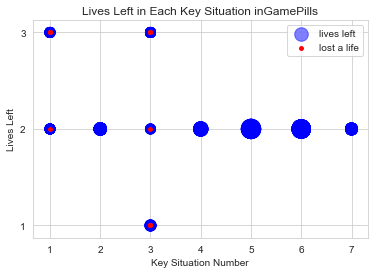

In [29]:
for index, agent in enumerate(agentKeyStates):
    plt.scatter("keyNum", "lives", s='epoch reward', c= 'b', data = agent, alpha = 0.5, label = "lives left")
    plt.scatter("keyNum", "lives", s=15, data = agentKeyDeaths[index], color = "red", label = "lost a life")
    plt.ylabel('Lives Left')
    plt.xlabel('Key Situation Number')
    plt.title("Lives Left in Each Key Situation " + agentKeyNames[index])
    plt.yticks([1,2,3],)
    plt.legend(loc="best")
    # call savefig right before show
    # set up filename
    #filename = agentKeyNames[index] + "KeySitchLifeDist.png"
    #savePath = os.path.join(folderList[index], filename)
    #plt.savefig(savePath, dpi=300, bbox_inches='tight')
    plt.show()

['', 'up', 'right', 'left', 'down', '']


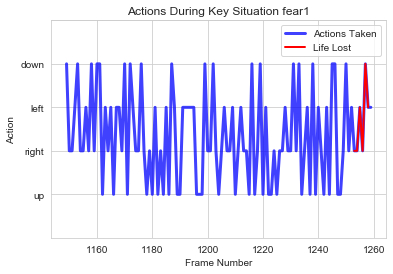

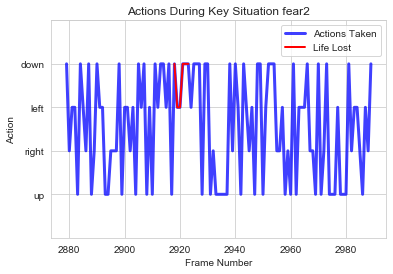

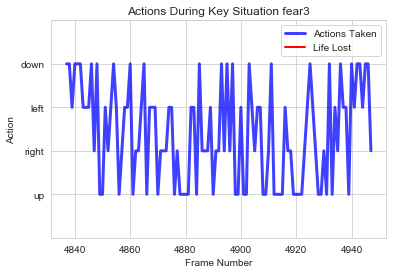

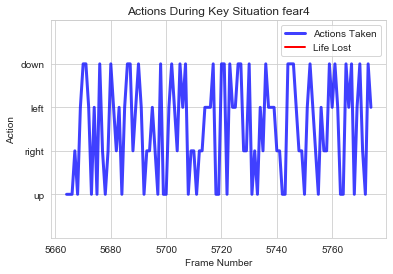

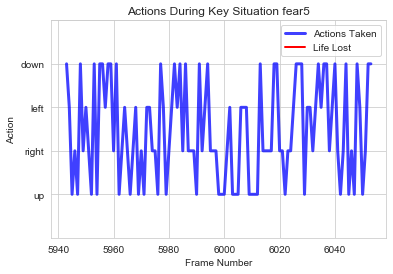

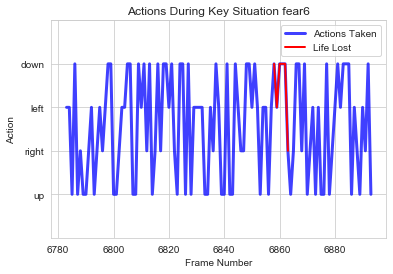

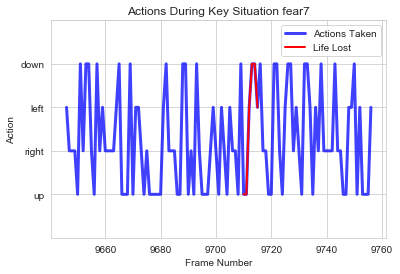

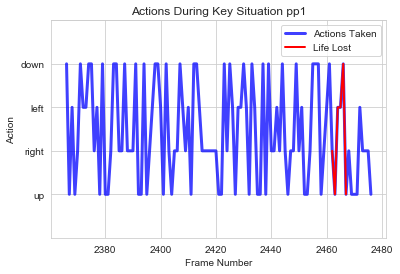

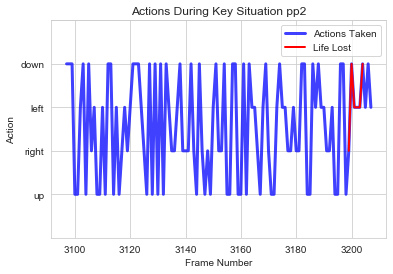

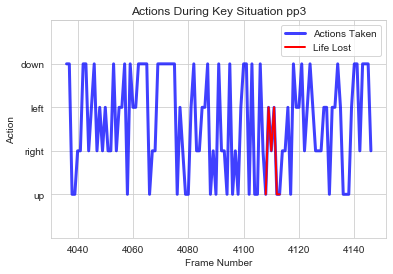

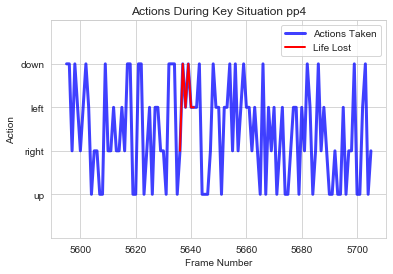

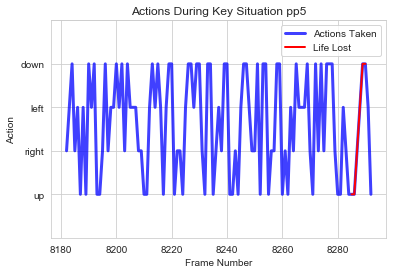

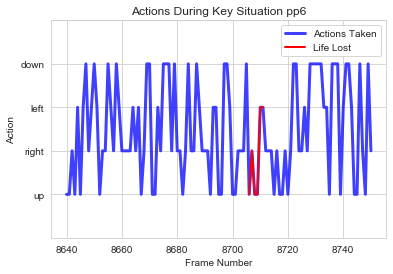

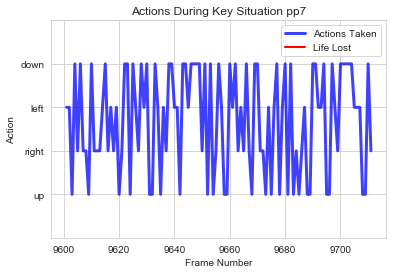

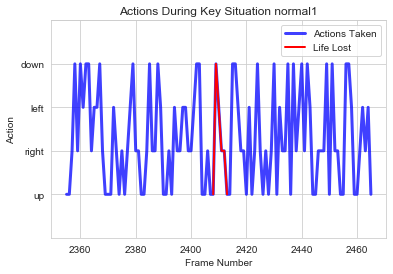

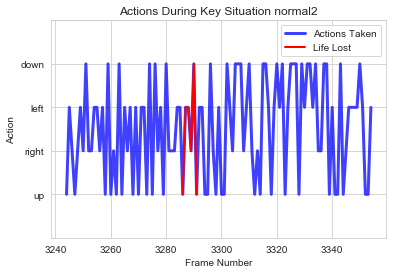

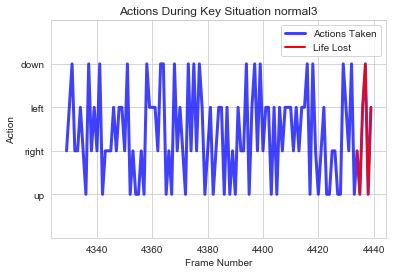

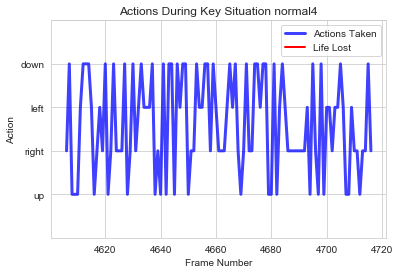

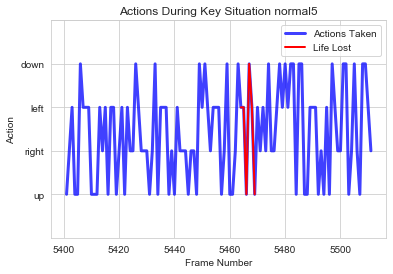

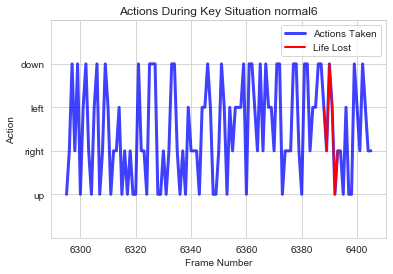

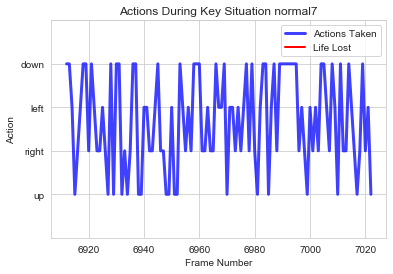

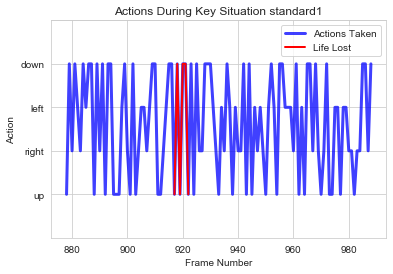

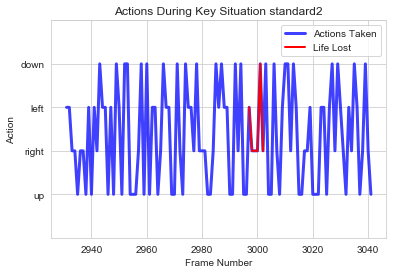

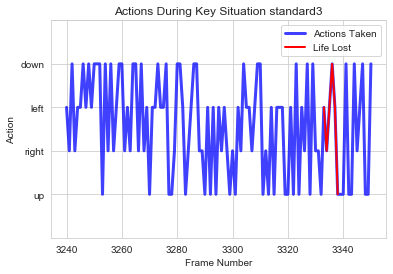

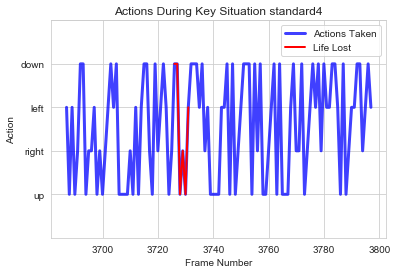

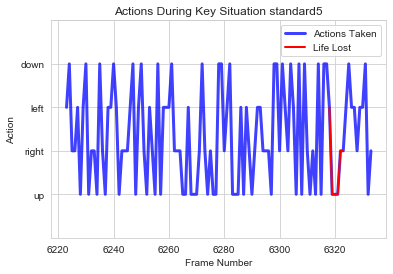

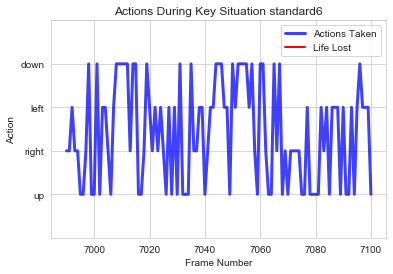

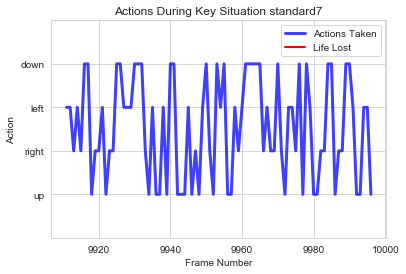

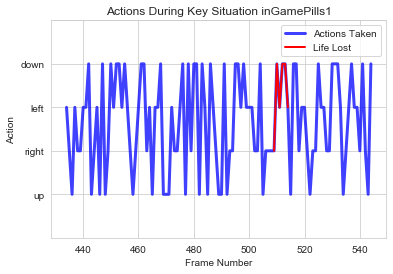

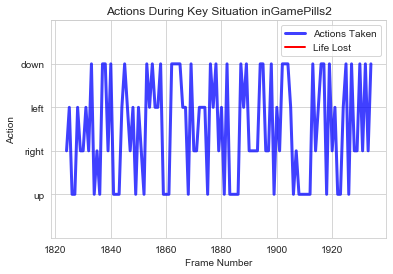

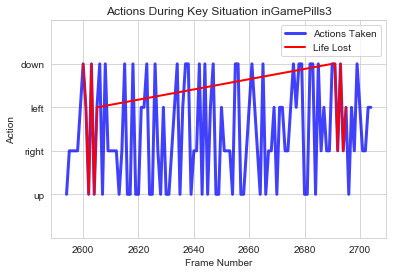

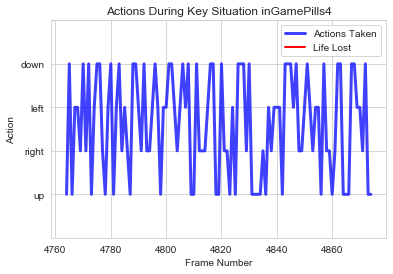

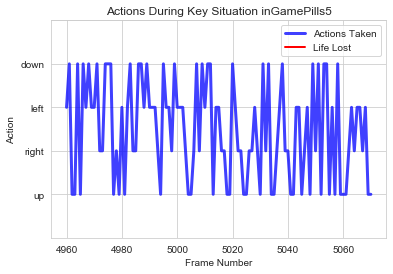

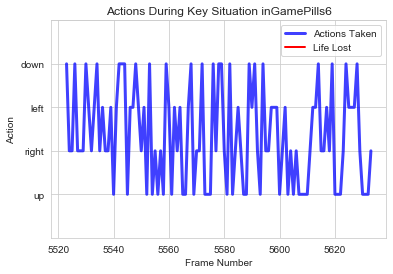

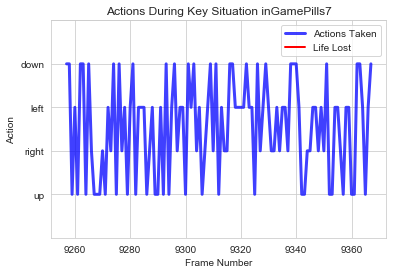

In [27]:
specialACT = list()
specialACT.append("")
for i in actionNames:
    specialACT.append(i)
specialACT.append("")
print(specialACT)
for index, agent in enumerate(agentKeyStates):
    for i in agent.keyNum.unique():
        plt.plot("state","action", data = agent[agent['keyNum']==i], label = "Actions Taken", c='b', alpha=0.75, linewidth=3)
        plt.plot("state","action", data = agentKeyDeaths[index][agentKeyDeaths[index]['keyNum']==i], label = "Life Lost", c='r', linewidth=2)
        plt.xlabel('Frame Number')
        plt.ylabel('Action')
        plt.title("Actions During Key Situation " + agentKeyNames[index] + str(i))
        plt.yticks([0,1,2,3,4,5], specialACT)
        plt.legend(loc="best")
        # call savefig right before show
        # set up filename
        #filename = agentKeyNames[index] + "actionsTakenInKeySitch" + str(i) + ".png"
        #savePath = os.path.join(folderList[index], filename)
        #plt.savefig(savePath, dpi=300, bbox_inches='tight')
        plt.show()
    

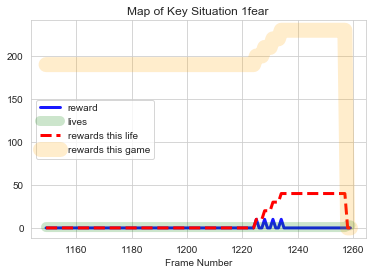

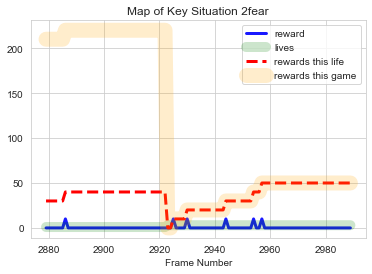

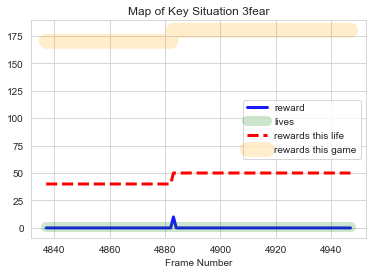

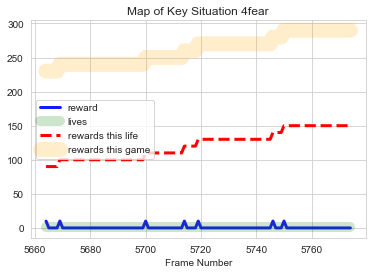

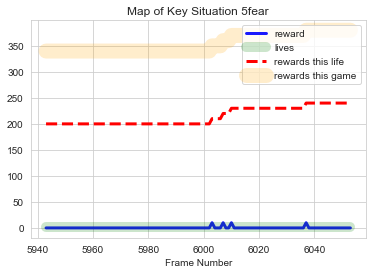

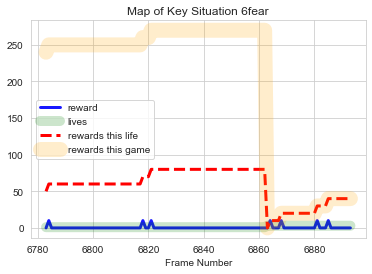

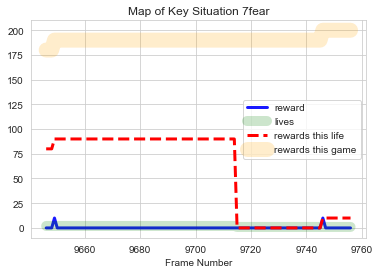

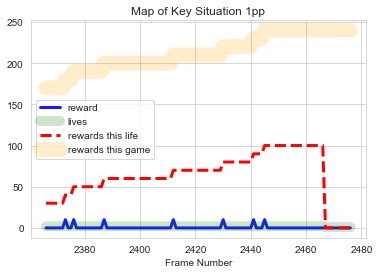

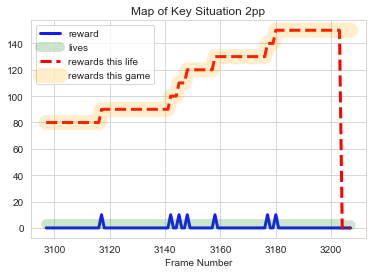

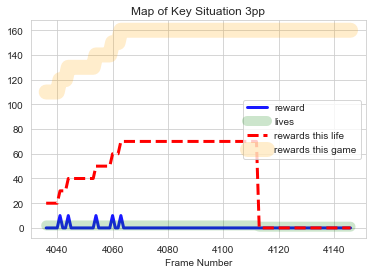

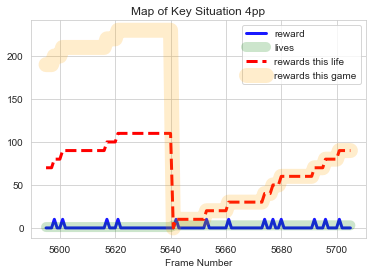

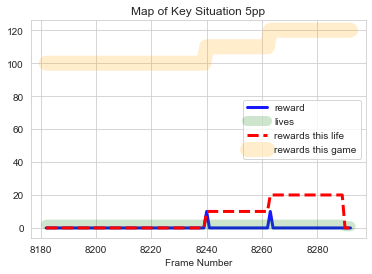

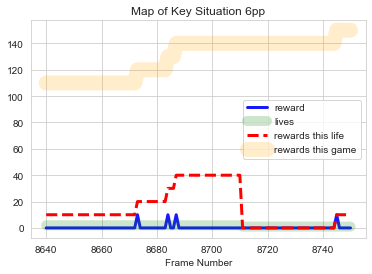

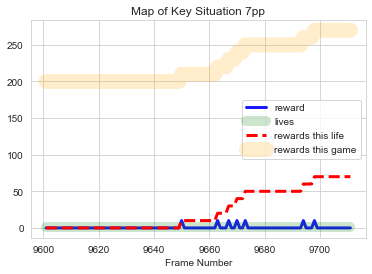

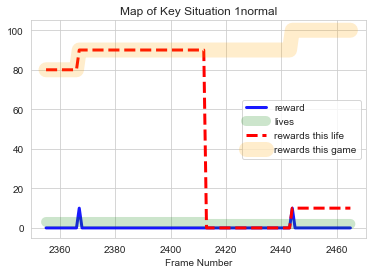

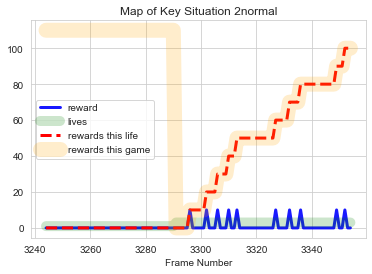

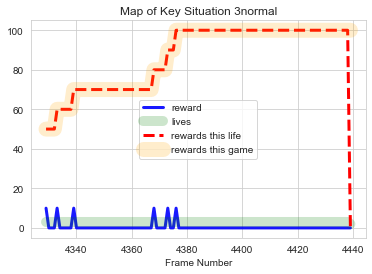

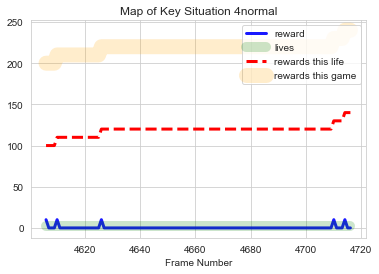

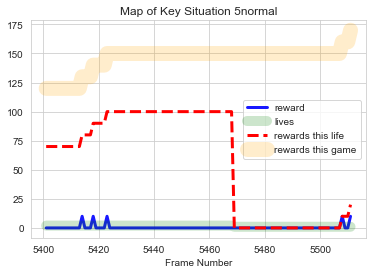

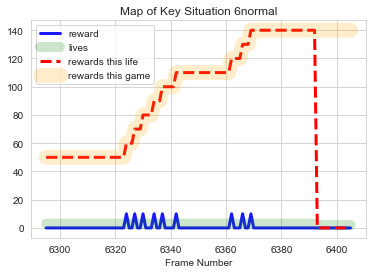

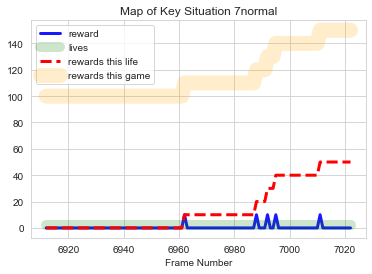

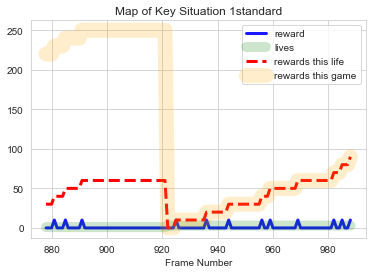

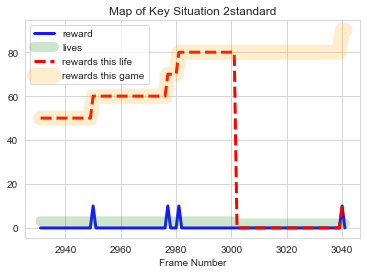

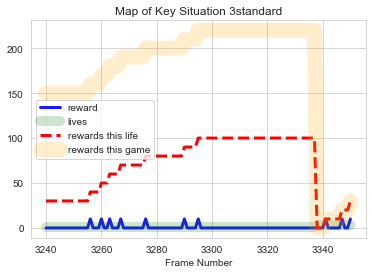

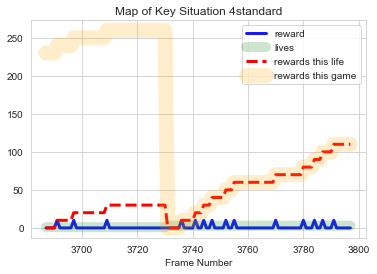

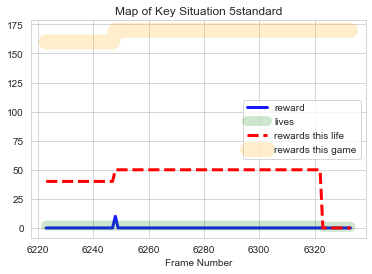

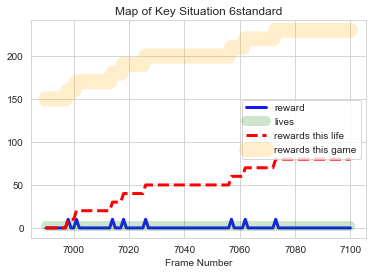

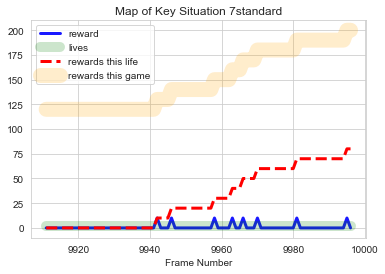

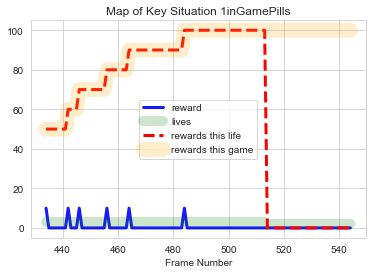

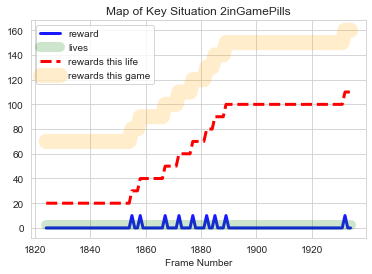

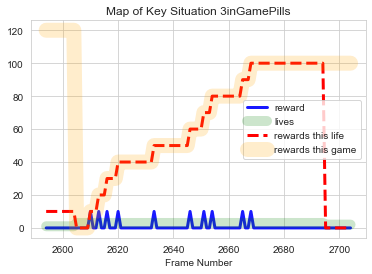

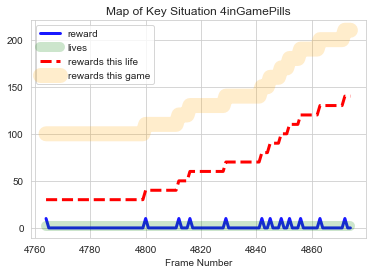

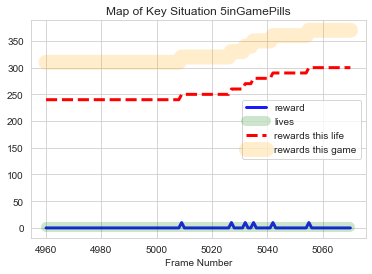

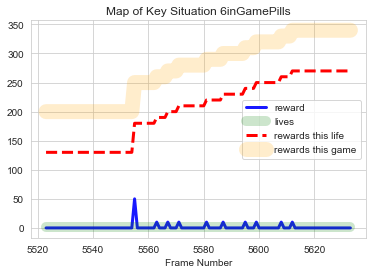

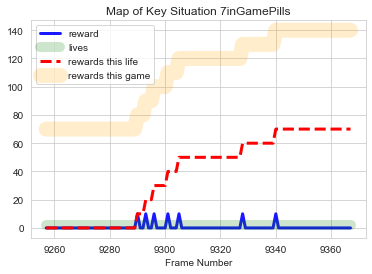

In [28]:
# try to combo some stuff

sns.set_style("whitegrid")
for index, agent in enumerate(agentKeyStates):
    for i in agent.keyNum.unique():
        plt.subplot()
        plt.plot("state", "reward", data = agent[agent['keyNum']==i], c='blue', linewidth=3, alpha = 0.9)
        plt.plot("state", "lives", data = agent[agent['keyNum']==i], c='green', linewidth=10, alpha = 0.2)
        plt.plot("state", "episode reward", data = agent[agent['keyNum']==i], c='red', linewidth=3, linestyle='--', label = 'rewards this life')
        plt.plot("state", "epoch reward", data = agent[agent['keyNum']==i], c='orange', linewidth=15, alpha = 0.2, label = 'rewards this game')
        plt.title("Map of Key Situation " + str(i) + agentKeyNames[index])
        plt.xlabel('Frame Number')
        plt.legend(loc="best")
        # call savefig right before show
        # set up filename
        #filename = agentKeyNames[index] + "SubwayMapSitch" + str(i) + ".png"
        #savePath = os.path.join(folderList[index], filename)
        #plt.savefig(savePath, dpi=300, bbox_inches='tight')
        plt.show()
        

['up', 'right', 'left', 'down']
[1]
action
1    0
2    6
3    6
4    4
Name: action, dtype: int64
['', 'right', 'left', 'down']


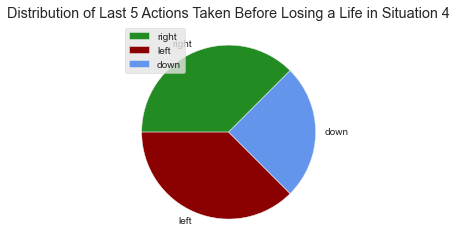

[1]
[2]
action
1     0
2     0
3     6
4    16
Name: action, dtype: int64
['', '', 'left', 'down']


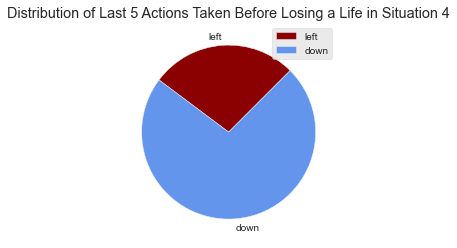

[1]
action
1     0
2     2
3     3
4    16
Name: action, dtype: int64
['', 'right', 'left', 'down']


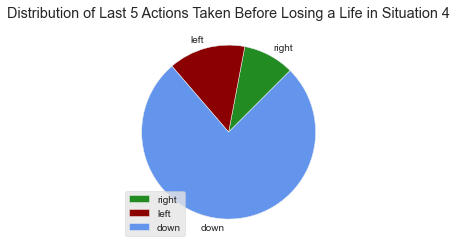

[2]
action
1    2
2    0
3    6
4    8
Name: action, dtype: int64
['up', '', 'left', 'down']


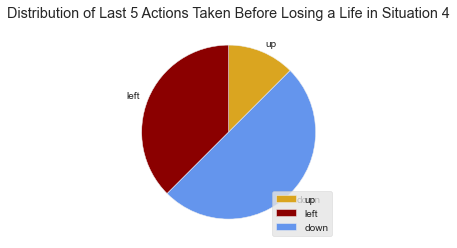

action
1    2
2    2
3    6
4    4
Name: action, dtype: int64
['up', 'right', 'left', 'down']


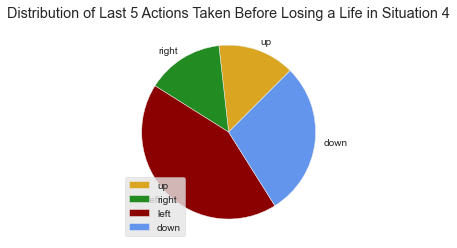

[1]
action
1    0
2    2
3    9
4    8
Name: action, dtype: int64
['', 'right', 'left', 'down']


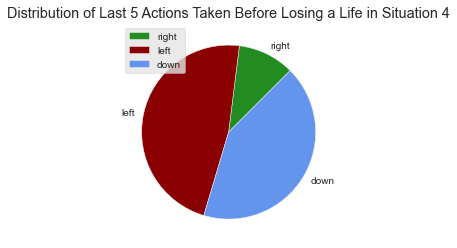

[4]
action
1    3
2    2
3    6
4    0
Name: action, dtype: int64
['up', 'right', 'left', '']


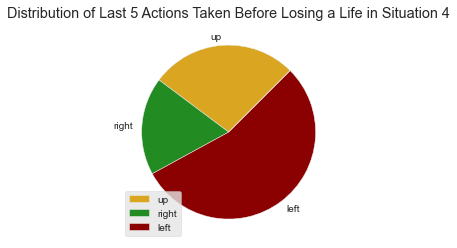

[1]
action
1    0
2    2
3    9
4    8
Name: action, dtype: int64
['', 'right', 'left', 'down']


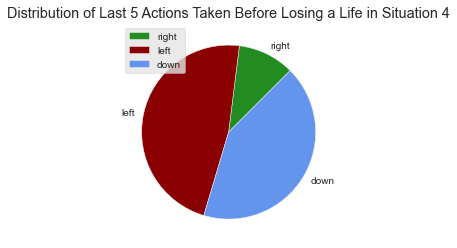

action
1    2
2    2
3    3
4    8
Name: action, dtype: int64
['up', 'right', 'left', 'down']


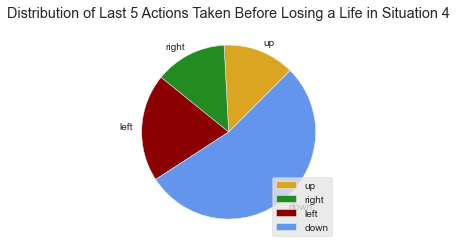

[4]
action
1    3
2    2
3    6
4    0
Name: action, dtype: int64
['up', 'right', 'left', '']


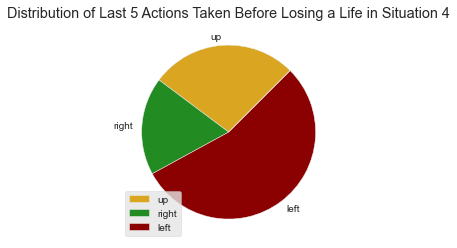

action
1    2
2    4
3    3
4    4
Name: action, dtype: int64
['up', 'right', 'left', 'down']


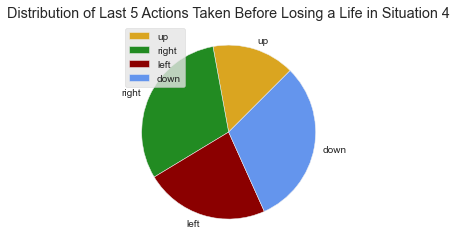

action
1    2
2    2
3    6
4    4
Name: action, dtype: int64
['up', 'right', 'left', 'down']


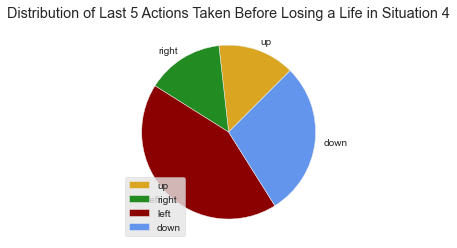

action
1    2
2    2
3    6
4    4
Name: action, dtype: int64
['up', 'right', 'left', 'down']


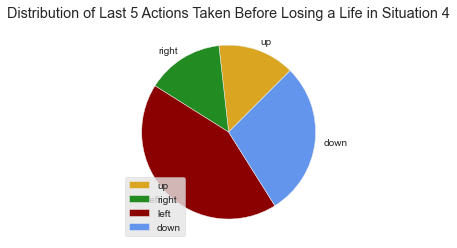

[2]
action
1    2
2    0
3    9
4    4
Name: action, dtype: int64
['up', '', 'left', 'down']


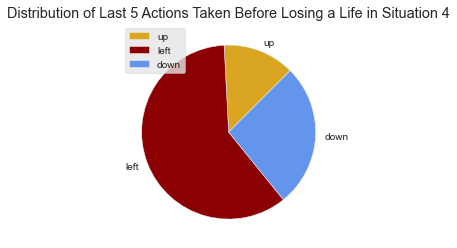

action
1    1
2    4
3    6
4    4
Name: action, dtype: int64
['up', 'right', 'left', 'down']


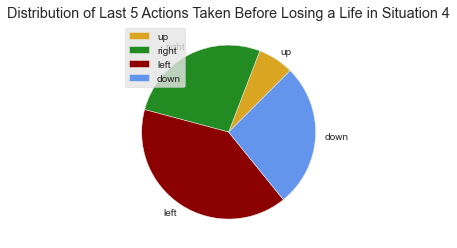

[2]
[3]
action
1     3
2     0
3     0
4    12
Name: action, dtype: int64
['up', '', '', 'down']


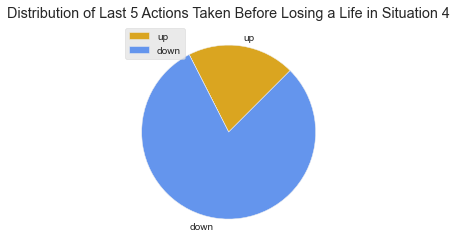

[1]
action
1    0
2    8
3    3
4    4
Name: action, dtype: int64
['', 'right', 'left', 'down']


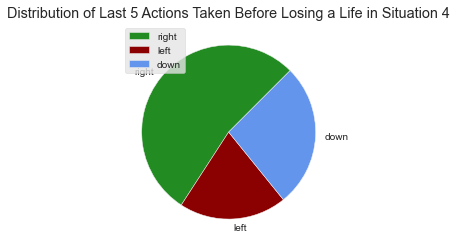

action
1    1
2    2
3    9
4    4
Name: action, dtype: int64
['up', 'right', 'left', 'down']


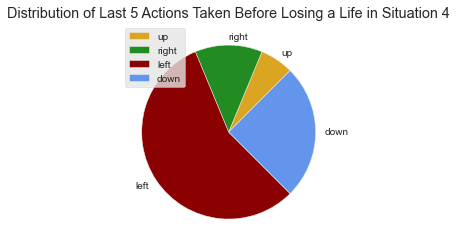

action
1    2
2    2
3    3
4    8
Name: action, dtype: int64
['up', 'right', 'left', 'down']


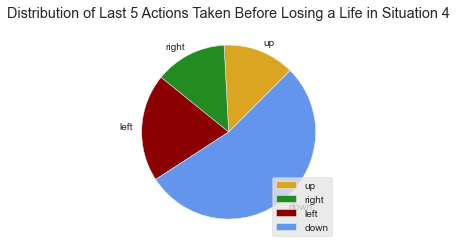

[4]
action
1    3
2    4
3    3
4    0
Name: action, dtype: int64
['up', 'right', 'left', '']


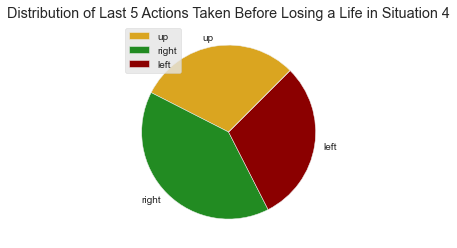

In [20]:
cmap = plt.get_cmap("tab20c")
outer_colors = ['goldenrod', 'forestgreen', 'darkred', 'cornflowerblue']
nums = [1,2,3,4]
tempActionNames = actionNames
print(tempActionNames)
for index, agent in enumerate(agentKeyDeaths):
    for i in agent.keyNum.unique():
        tempActionNames2 = ['up','right','left','down']
        values = agent[agent['keyNum']==i].groupby([agent.action]).sum()['action']
        for i in nums:
            if(not i in values.index.values):
                print([i])
                values.loc[i] = 0
                tempActionNames2[i-1] = ""
        values = values.sort_index()
        print(values)
        print(tempActionNames2)
        
        plt.pie(x=values, data = agent[agent['keyNum']==i].groupby([agent.action]).sum(), 
                labels = tempActionNames2, colors = outer_colors, startangle = 45)
        plt.legend(loc="best")
        plt.title("Distribution of Last 5 Actions Taken Before Losing a Life in Situation " + str(i))
        # call savefig right before show
        # set up filename
        #filename = agentKeyNames[index] + "ActionsPieChartSitch" + str(i) + ".png"
        #savePath = os.path.join(folderList[index], filename)
        #plt.savefig(savePath, dpi=300, bbox_inches='tight')
        plt.show()
    

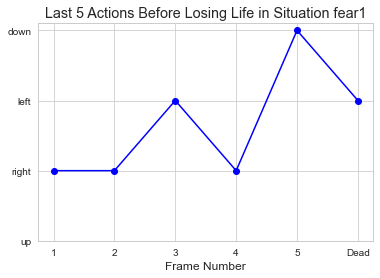

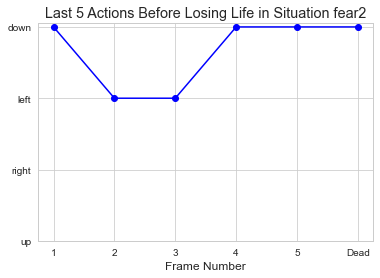

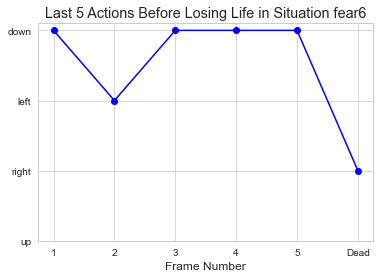

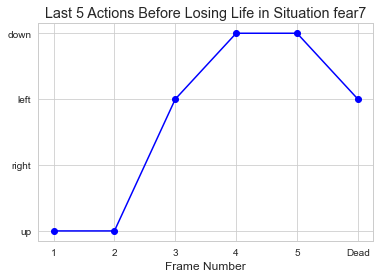

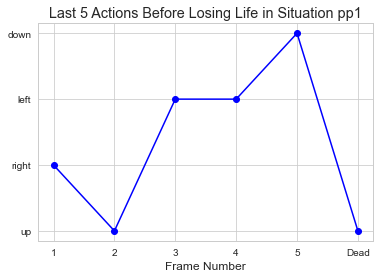

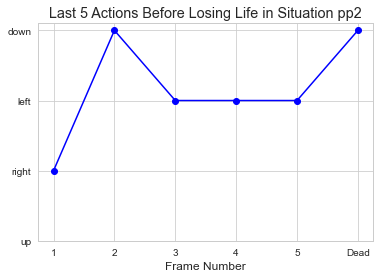

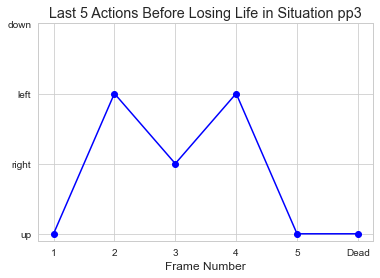

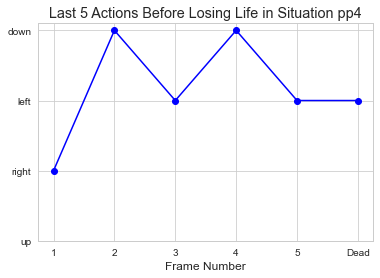

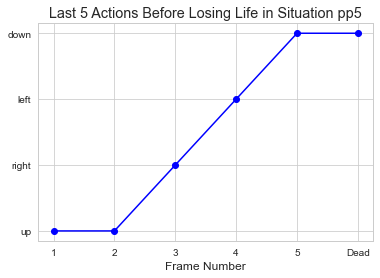

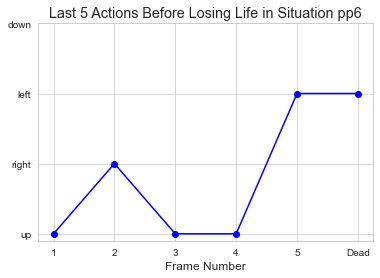

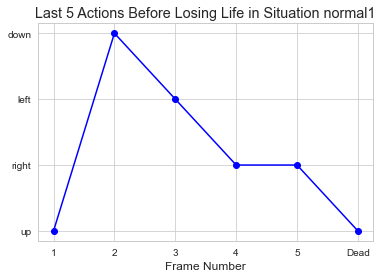

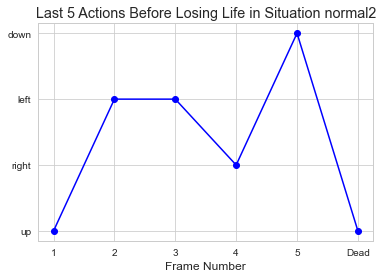

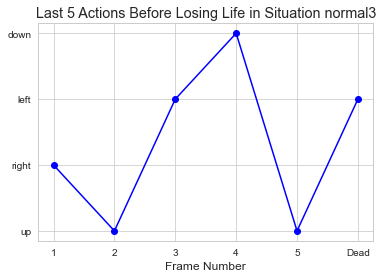

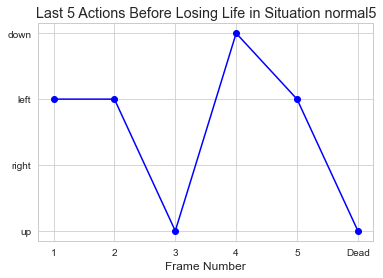

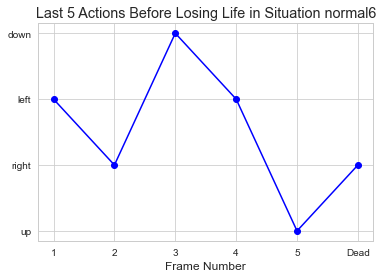

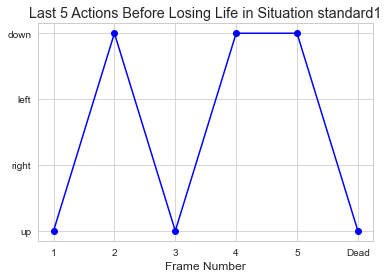

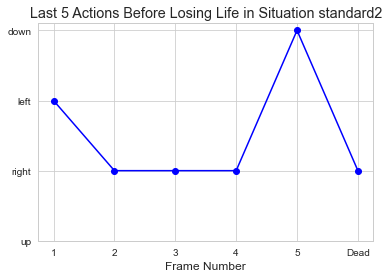

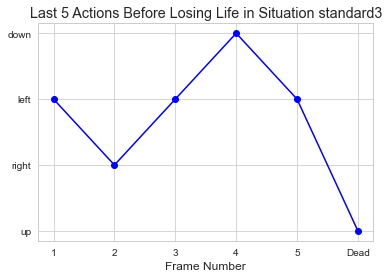

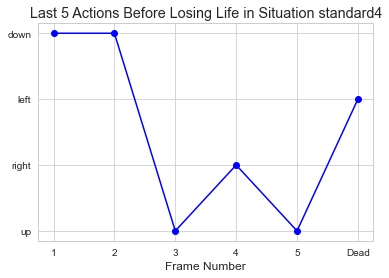

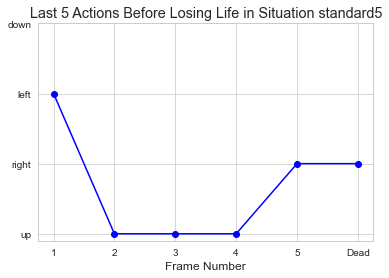

In [44]:
sns.set_style("whitegrid")
for index, agent in enumerate(agentKeyDeaths):
    for i in agent.keyNum.unique():
        plt.plot("state", "action", data = agent[agent['keyNum']==i], marker='o', c='b')
        plt.xticks(agent[agent['keyNum']==i]['state'], [1,2,3,4,5,"Dead"])
        plt.xlabel("Frame Number")
        plt.yticks([1,2,3,4], actionNames)
        plt.title("Last 5 Actions Before Losing Life in Situation " + agentKeyNames[index] + str(i))
        # call savefig right before show
        # set up filename
        #filename = agentKeyNames[index] + "actionsBeforeDeathSitch" + str(i) + ".png"
        #savePath = os.path.join(folderList[index], filename)
        #plt.savefig(savePath, dpi=300, bbox_inches='tight')
        plt.show()

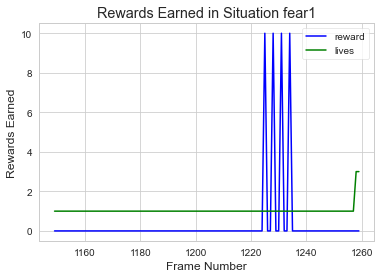

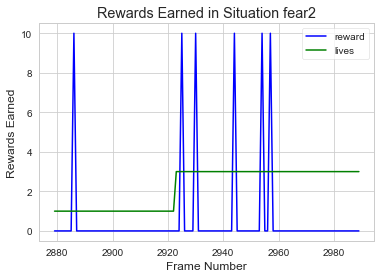

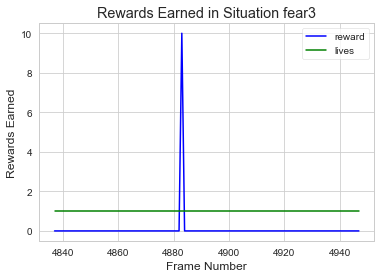

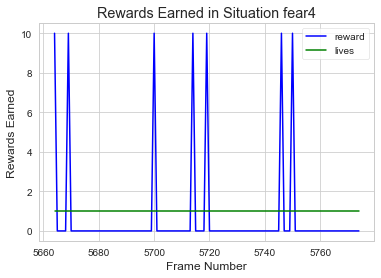

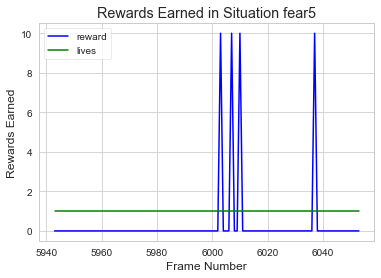

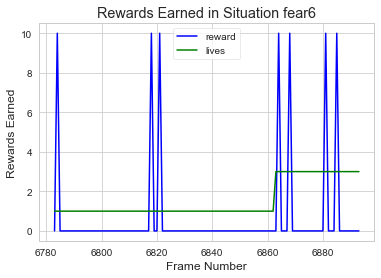

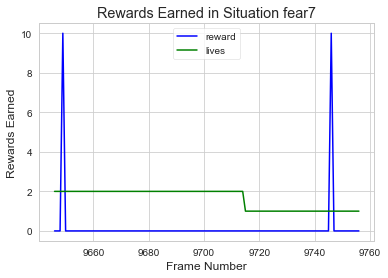

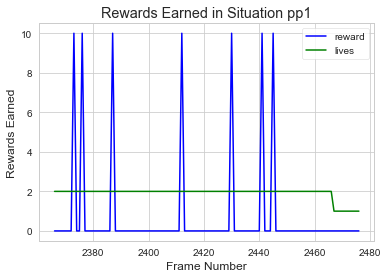

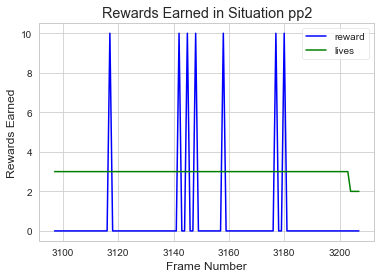

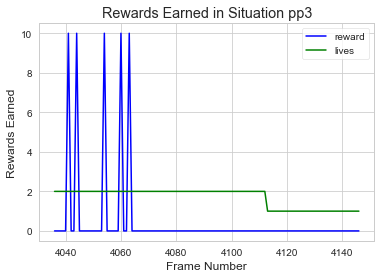

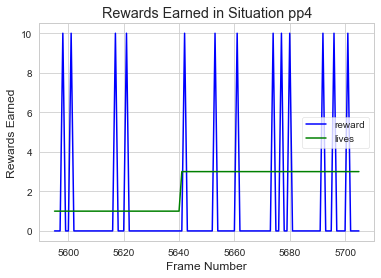

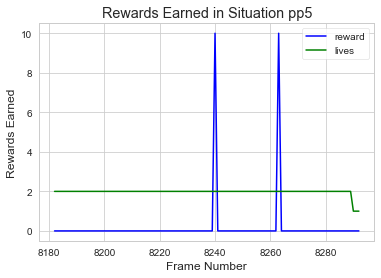

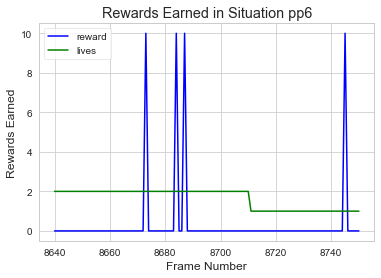

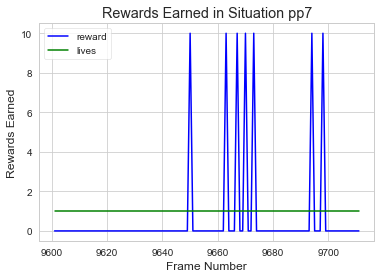

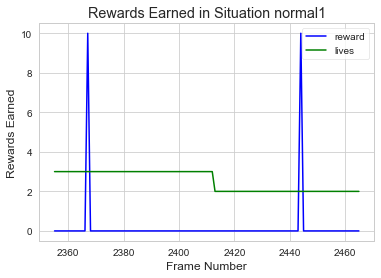

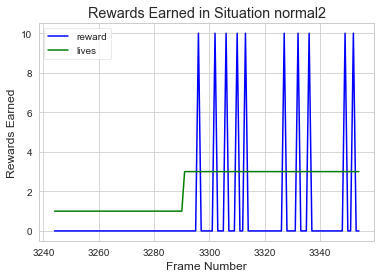

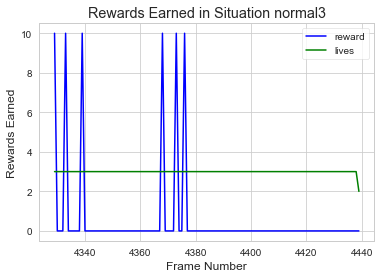

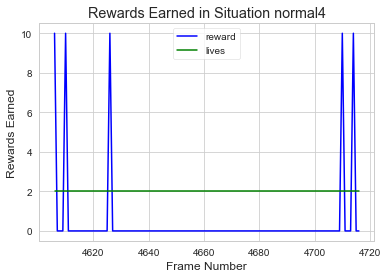

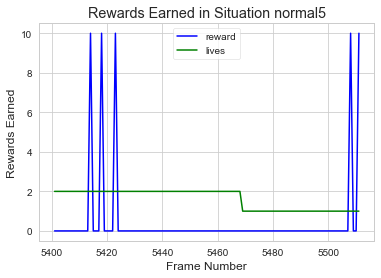

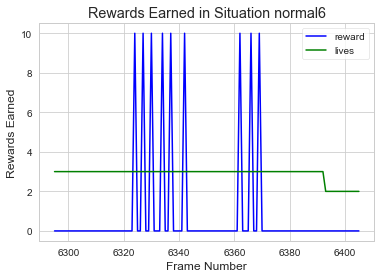

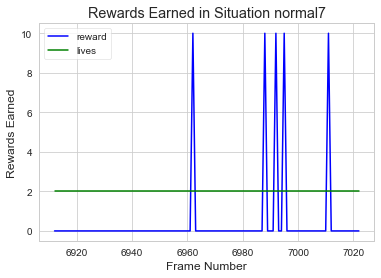

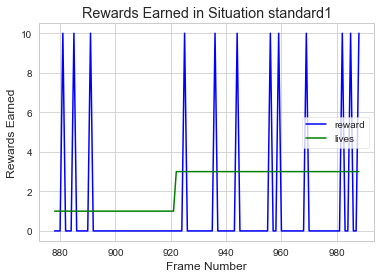

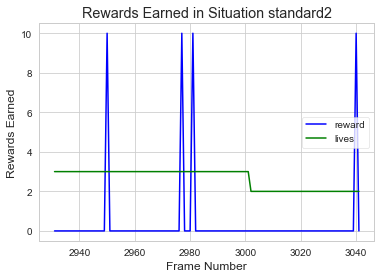

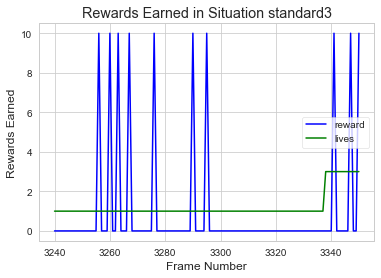

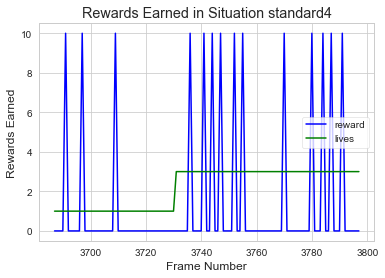

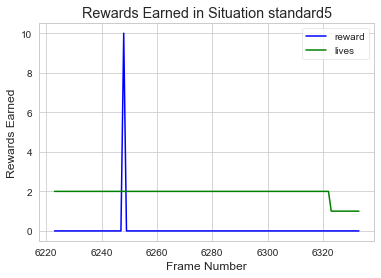

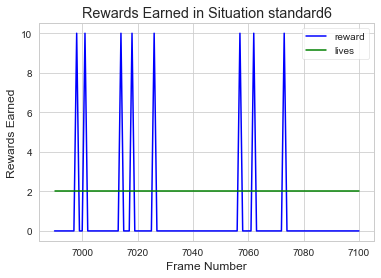

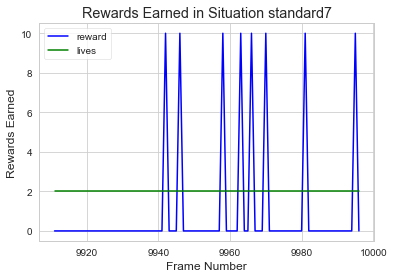

In [45]:
sns.set_style("whitegrid")
for index, agent in enumerate(agentKeyStates):
    for i in agent.keyNum.unique():
        plt.plot("state", "reward", data = agent[agent['keyNum']==i], c='blue')
        plt.plot("state", "lives", data = agent[agent['keyNum']==i], c='green')
        plt.xlabel("Frame Number")
        plt.ylabel("Rewards Earned")
        plt.title("Rewards Earned in Situation " + agentKeyNames[index] + str(i))
        plt.legend(loc="best")
        # call savefig right before show
        # set up filename
        #filename = agentKeyNames[index] + "RewardsOverTimeInSitch" + str(i) + ".png"
        #savePath = os.path.join(folderList[index], filename)
        #plt.savefig(savePath, dpi=300, bbox_inches='tight')
        plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


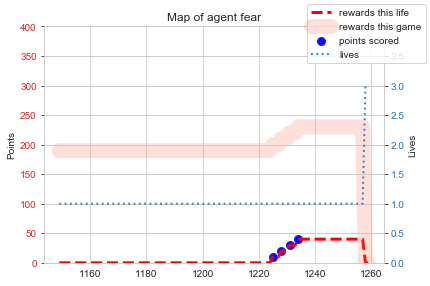

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


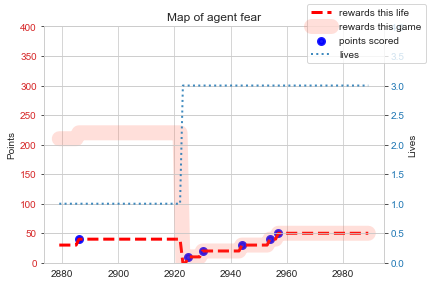

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


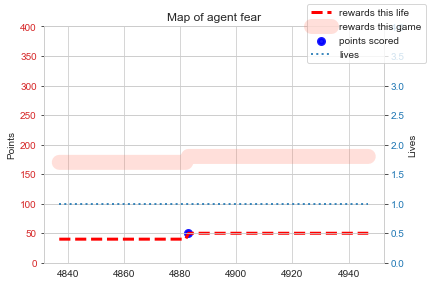

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


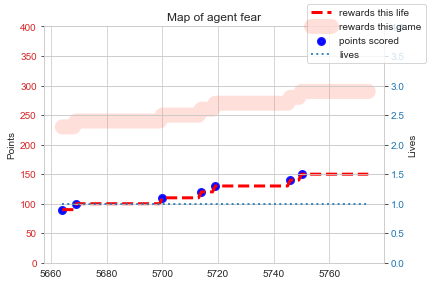

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


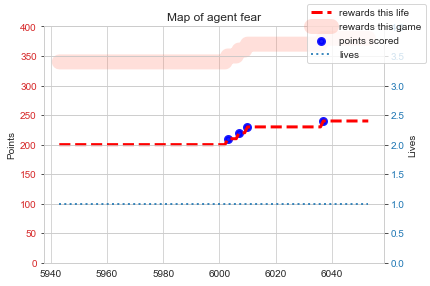

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


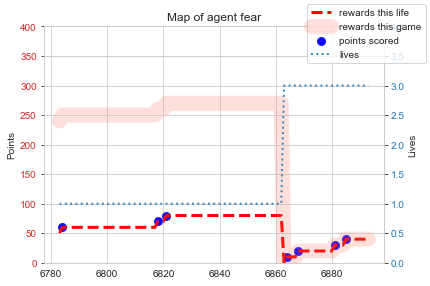

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


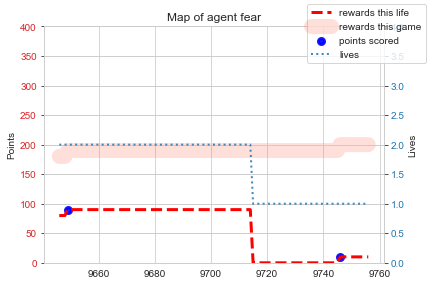

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


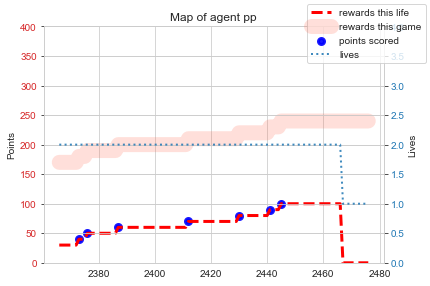

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


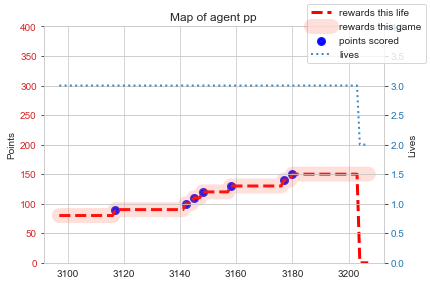

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


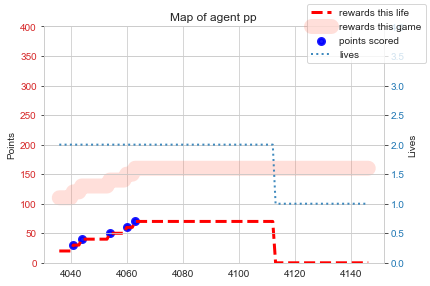

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


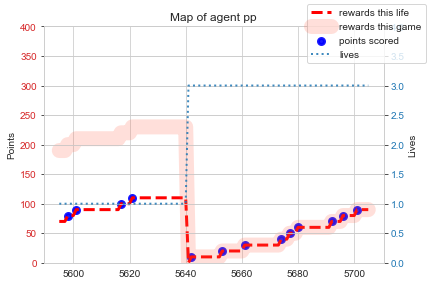

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


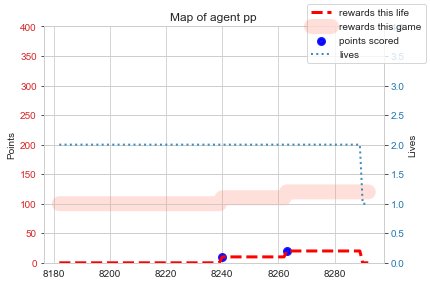

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


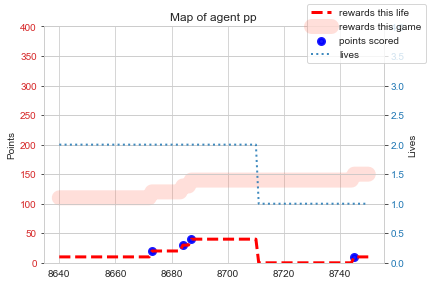

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


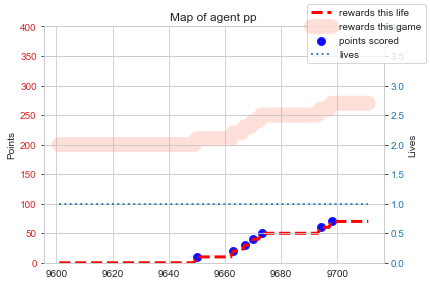

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


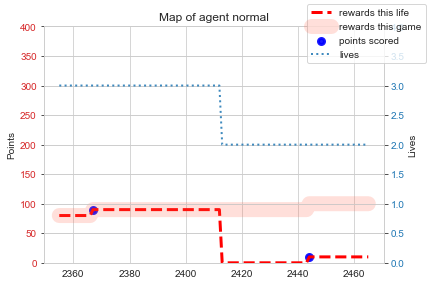

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


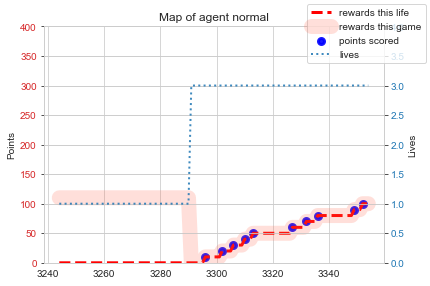

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


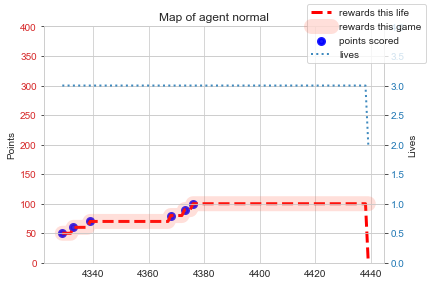

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


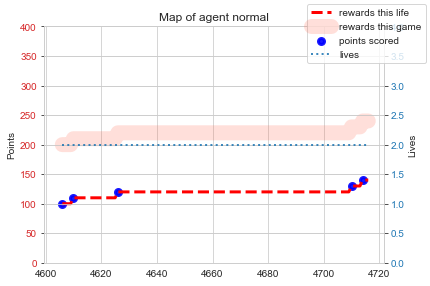

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


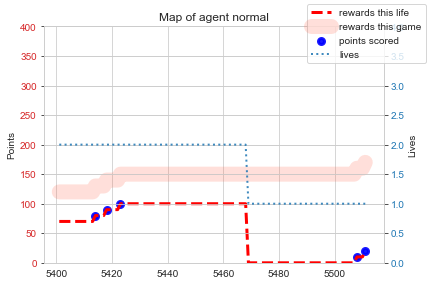

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


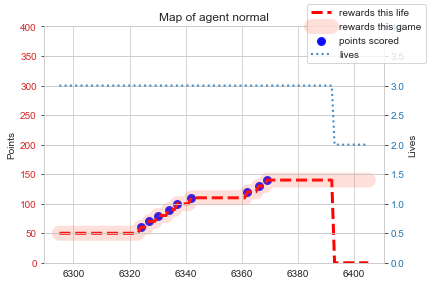

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


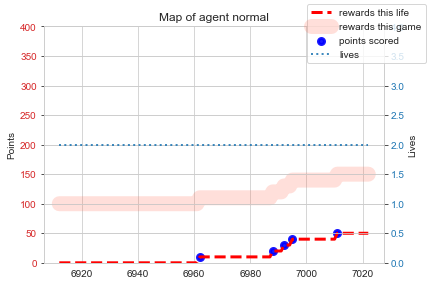

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


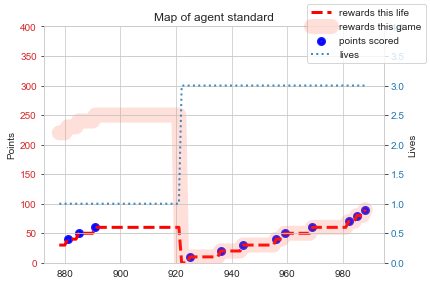

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


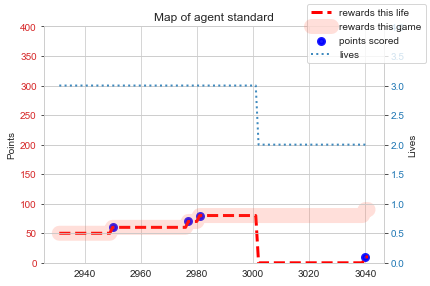

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


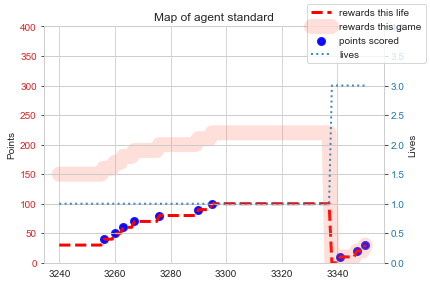

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


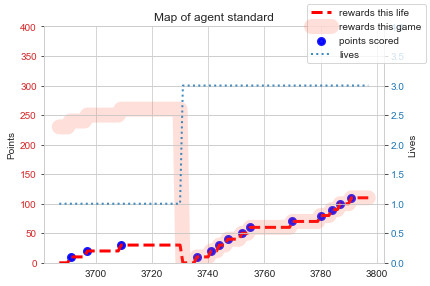

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


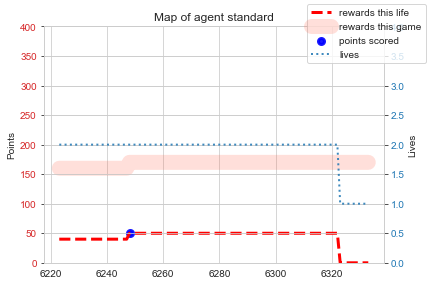

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


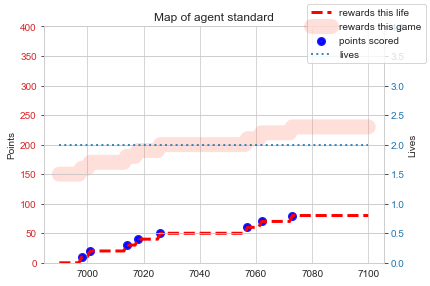

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


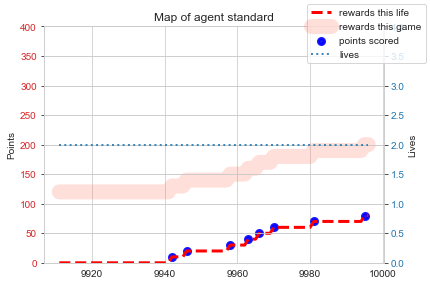

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


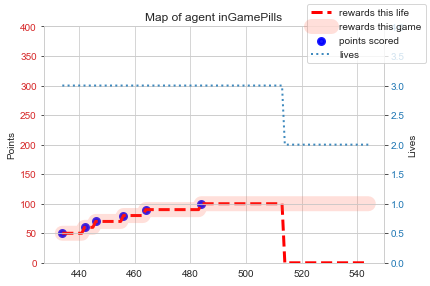

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


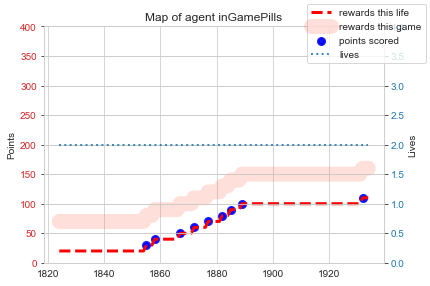

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


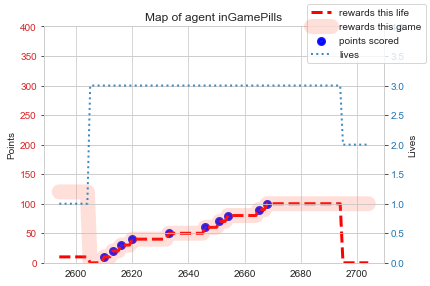

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


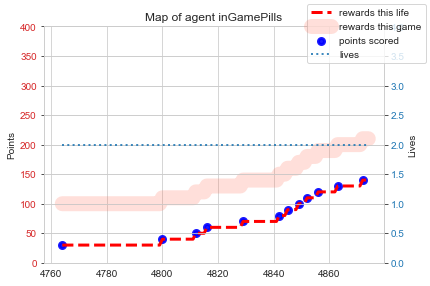

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


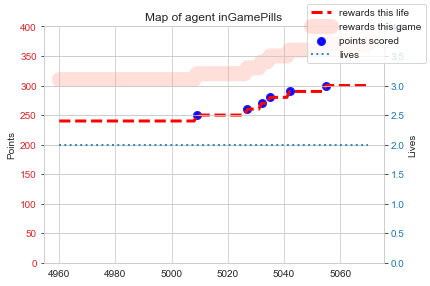

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


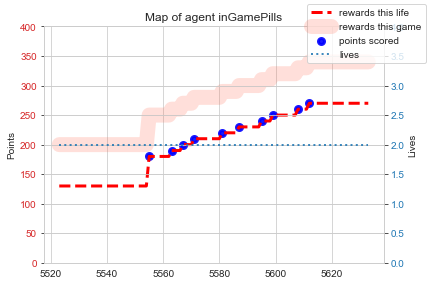

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


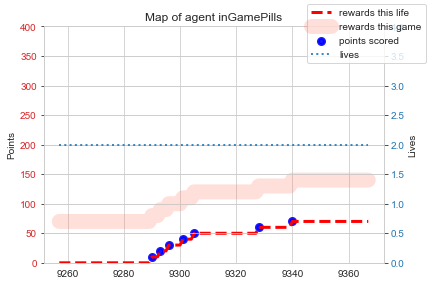

In [73]:
sns.set_style("whitegrid")
for index, agent in enumerate(agentKeyStates):
    for i in agent.keyNum.unique():
        fig, ax1 = plt.subplots()
        color = 'tab:red'
        ax1.plot("state", "episode reward", data = agent[agent['keyNum']==i], c='red', linewidth=3, linestyle='--', label = 'rewards this life')
        ax1.plot("state", "epoch reward", data = agent[agent['keyNum']==i], c='tomato', linewidth=15, alpha = 0.2, label = 'rewards this game')
        ax1.scatter("state", "episode reward", data = agent.loc[(agent['keyNum']==i) & (agent['reward']>0)], c='blue', linewidth=3, alpha = 0.9, label="points scored")
        ax1.set_ylim(0,400)
        ax1.set_ylabel('Points')
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'

        ax2.plot("state", "lives", data = agent.loc[(agent['keyNum']==i)], c=color, linewidth=2, alpha = 0.86, linestyle=":")
        ax2.set_ylim(0,4)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_ylabel('Lives')

        plt.title("Map of agent " + agentKeyNames[index])
        

        fig.legend(loc="best")
        # call savefig right before show
        # set up filename
        #filename = agentKeyNames[index] + "SubwayMapSitch" + str(i) + ".png"
        #savePath = os.path.join(folderList[index], filename)
        #plt.savefig(savePath, dpi=300, bbox_inches='tight')
        fig.tight_layout()
        plt.show()
        
        
#         plt.plot("state", "reward", data = agent[agent['keyNum']==i], c='blue', linewidth=3, alpha = 0.9)
#         plt.plot("state", "lives", data = agent[agent['keyNum']==i], c='green', linewidth=10, alpha = 0.2)
#         plt.plot("state", "episode reward", data = agent[agent['keyNum']==i], c='red', linewidth=3, linestyle='--', label = 'rewards this life')
#         plt.plot("state", "epoch reward", data = agent[agent['keyNum']==i], c='orange', linewidth=15, alpha = 0.2, label = 'rewards this game')
#         plt.title("Map of Key Situation " + str(i))
#         plt.xlabel('Frame Number')
#         plt.legend(loc="best")
#         # call savefig right before show
#         # set up filename
#         #filename = agentKeyNames[index] + "SubwayMapSitch" + str(i) + ".png"
#         #savePath = os.path.join(folderList[index], filename)
#         #plt.savefig(savePath, dpi=300, bbox_inches='tight')
#         plt.show()

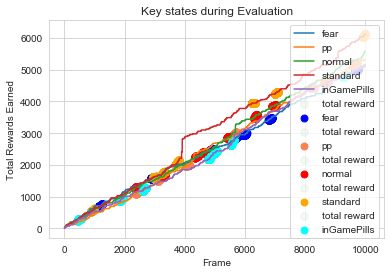

In [31]:
colorList = ['b', 'coral','r','orange','cyan']
for index, agent in enumerate(agentKeyStates):
    plt.plot("state", "total reward", data = agentList[index], label = agentKeyNames[index])
    plt.scatter('state', 'total reward', data = agent, s=58, c='green', alpha=0.05)
    plt.scatter('state', 'total reward', data = agentKeyStates[index], s=48, c=colorList[index], label = agentKeyNames[index])
    plt.xlabel('Frame')
    plt.ylabel('Total Rewards Earned')
    plt.title('Key states during Evaluation')
    plt.legend(loc="best")

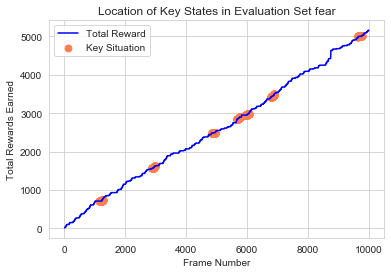

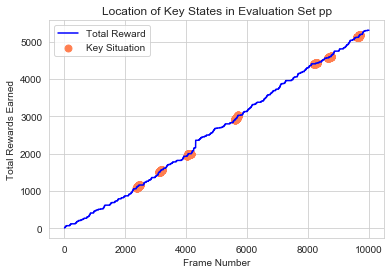

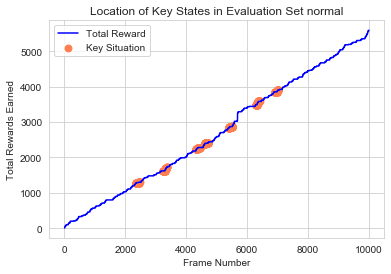

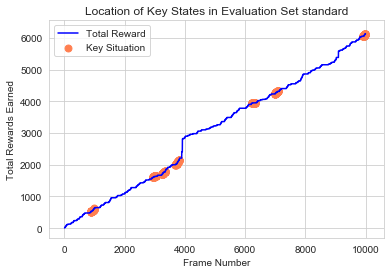

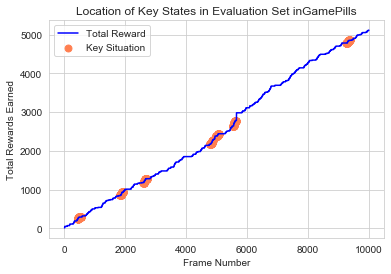

In [33]:
for index, agent in enumerate(agentKeyStates):
    plt.plot("state", "total reward", data = agentList[index], c='b', label = 'Total Reward')
#     plt.scatter('state', 'total reward', data = agent, s=58, c='green', alpha=0.05)
    plt.scatter('state', 'total reward', data = agentKeyStates[index], s=48, c='coral', label = 'Key Situation')
    plt.xlabel('Frame Number')
    plt.ylabel('Total Rewards Earned')
    plt.title('Location of Key States in Evaluation Set ' + agentKeyNames[index])
    plt.legend(loc="best")
    # call savefig right before show
    # set up filename
    #filename = agentKeyNames[index] + "KeySitchDistribution.png"
    #savePath = os.path.join(folderList[index], filename)
    #plt.savefig(savePath, dpi=300, bbox_inches='tight')
    plt.show()

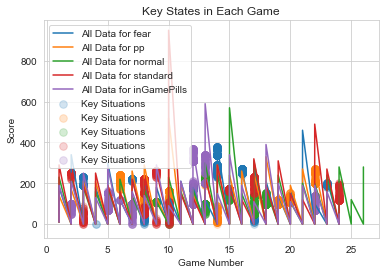

In [35]:
for index, agent in enumerate(agentKeyStates): 
    plt.plot("epoch", "epoch reward", data = agentList[index], label = "All Data for " + agentKeyNames[index])
    plt.scatter('epoch', 'epoch reward', data = agent, s=58,  alpha=0.2, label = "Key Situations")
    plt.xlabel('Game Number')
    plt.ylabel('Score')
    plt.title('Key States in Each Game')
    plt.legend(loc="best")

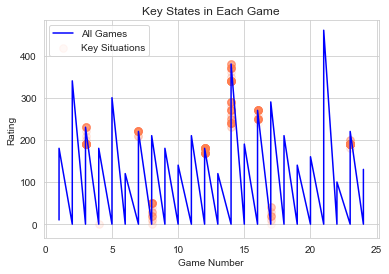

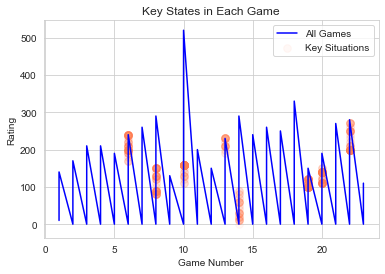

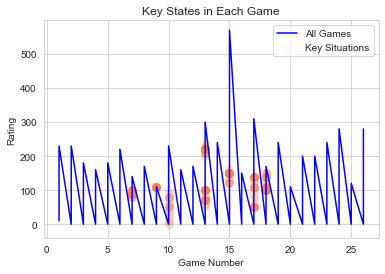

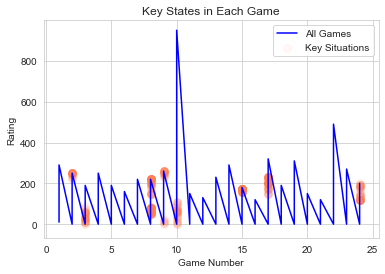

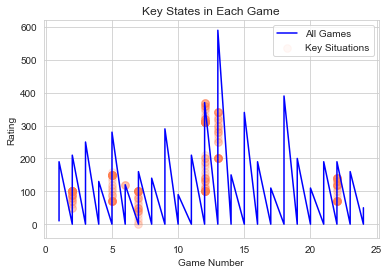

In [36]:
for index, agent in enumerate(agentKeyStates): 
    plt.plot("epoch", "epoch reward", data = agentList[index], c='blue', label = "All Games")
    plt.scatter('epoch', 'epoch reward', data = agent, s=58, c='coral', alpha=0.05, label = "Key Situations")
    plt.xlabel('Game Number')
    plt.ylabel('Rating')
    plt.title('Key States in Each Game')
    plt.legend(loc="best")
    # call savefig right before show
    # set up filename
    #filename = agentKeyNames[index] + "KeySitchAcrossGames" + str(i) + ".png"
    #savePath = os.path.join(folderList[index], filename)
    #plt.savefig(savePath, dpi=300, bbox_inches='tight')
    plt.show()

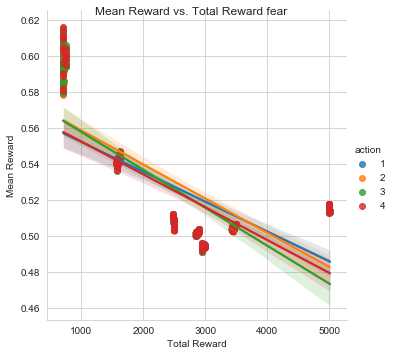

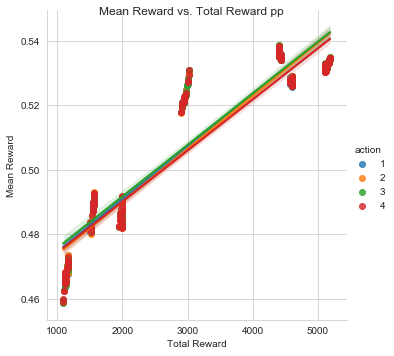

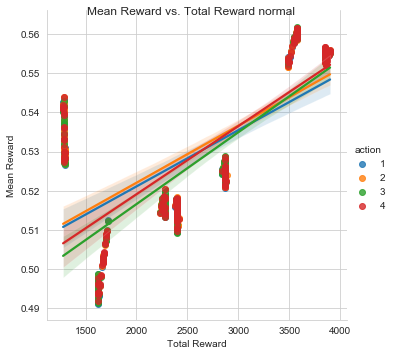

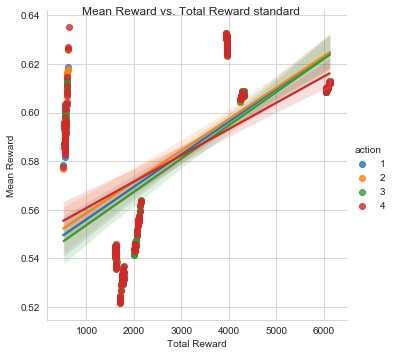

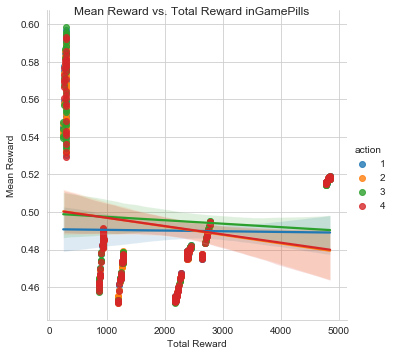

In [37]:
for index, agent in enumerate(agentKeyStates): 
    g = sns.lmplot(data=agent, x="total reward", y="mean reward", hue="action")
    g.fig.suptitle("Mean Reward vs. Total Reward " + agentKeyNames[index])
    g.set(xlabel='Total Reward', ylabel='Mean Reward')

/Users/byrdsmyth/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


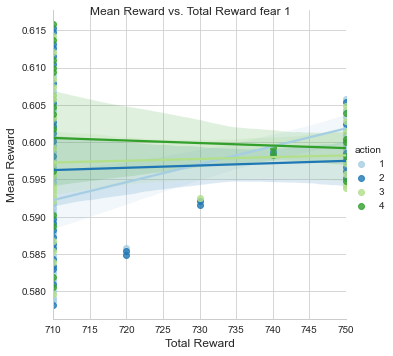

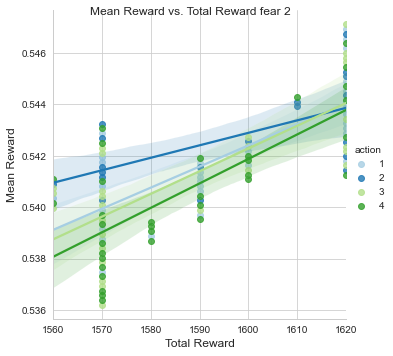

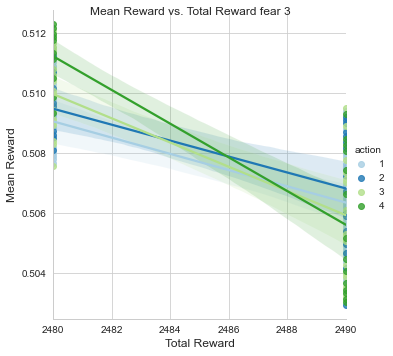

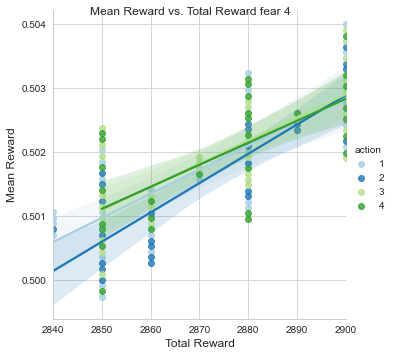

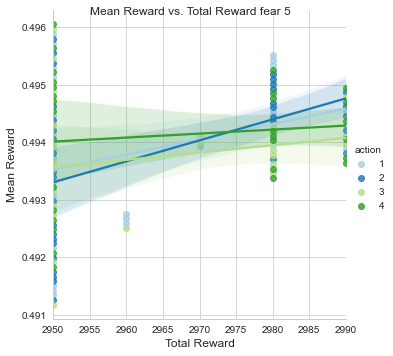

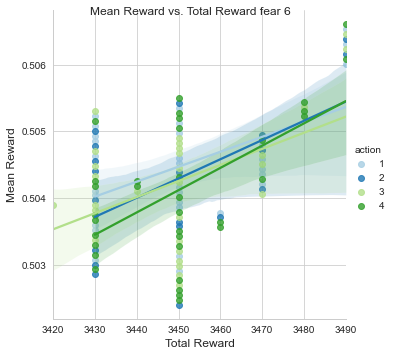

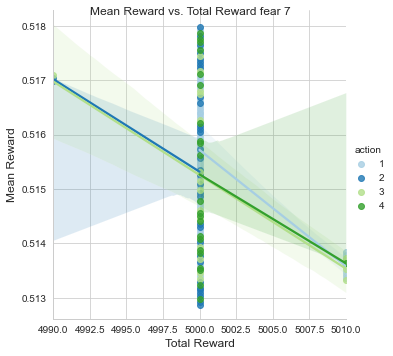

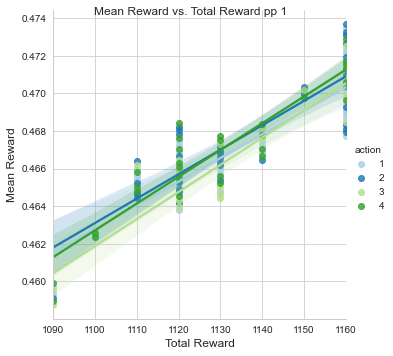

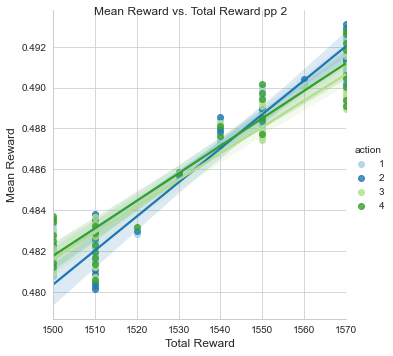

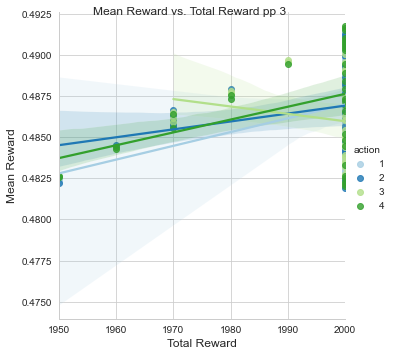

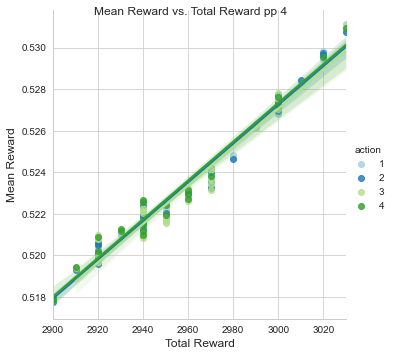

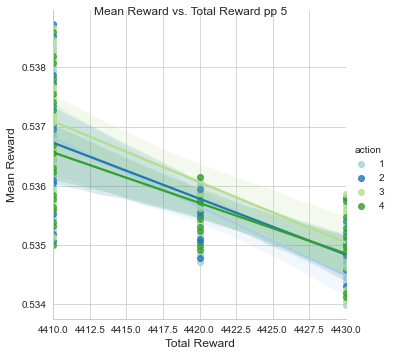

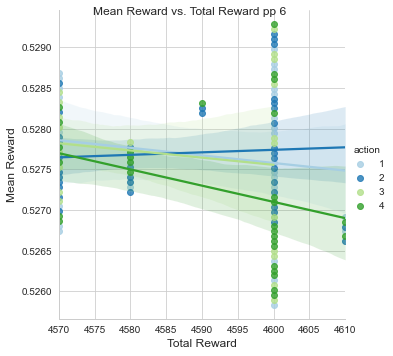

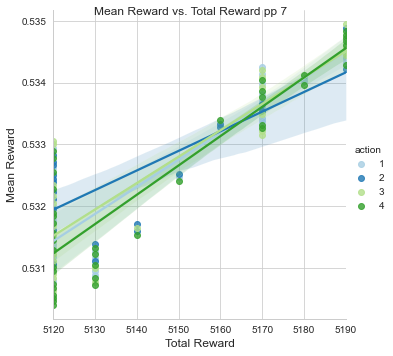

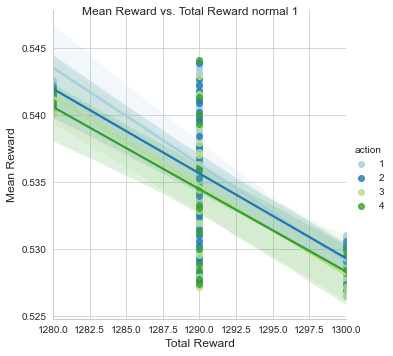

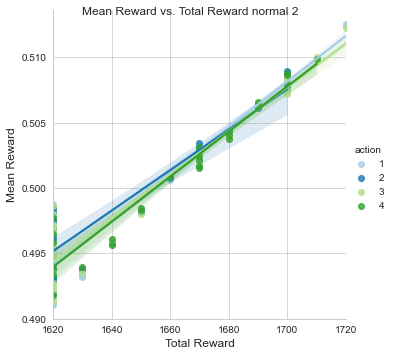

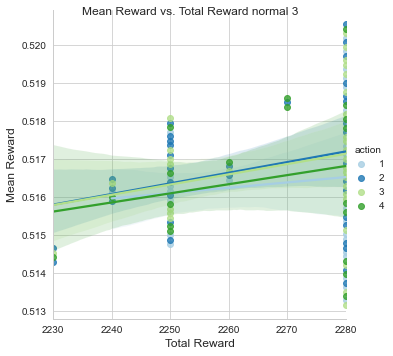

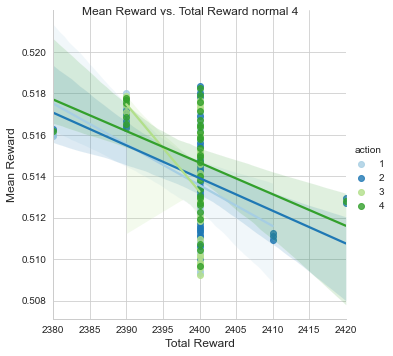

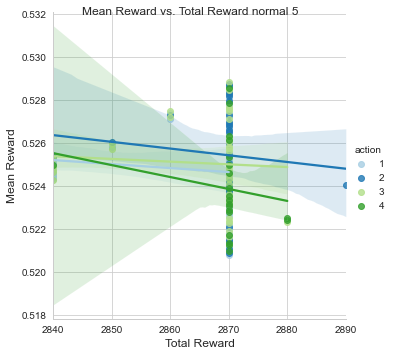

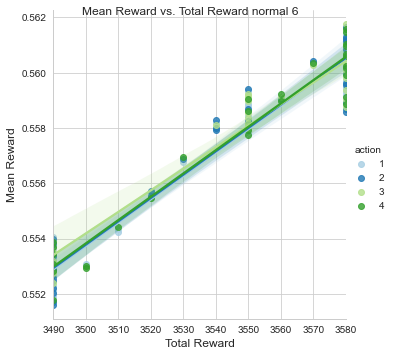

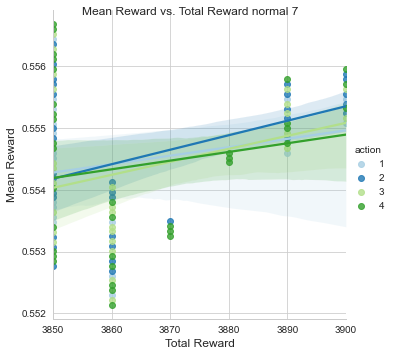

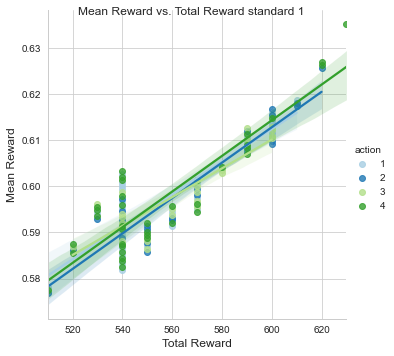

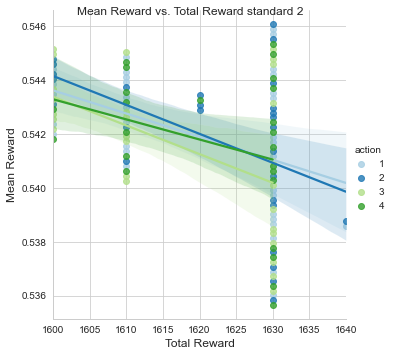

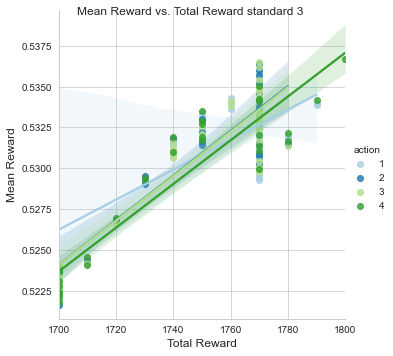

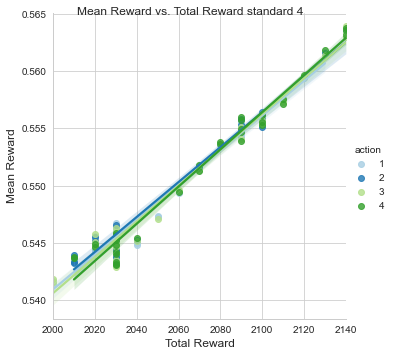

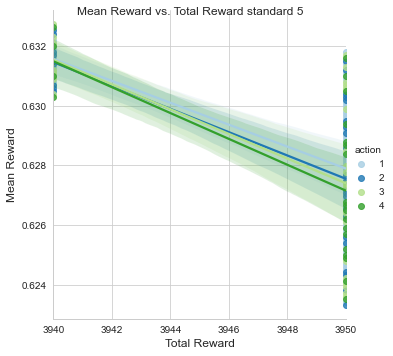

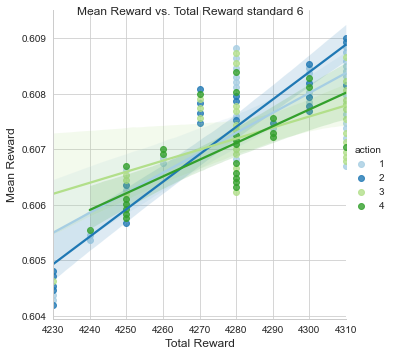

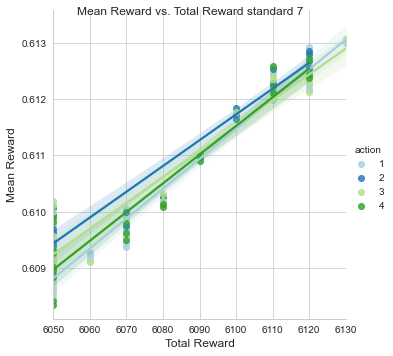

In [29]:
# Set the palette using the name of a palette:
sns.set_palette("Paired")
for index, agent in enumerate(agentKeyStates):
    for i in agent.keyNum.unique():
        g = sns.lmplot(data=agent[agent['keyNum']==i], x="total reward", y="mean reward", hue="action")
        g.fig.suptitle("Mean Reward vs. Total Reward " + agentKeyNames[index] + " " + str(i))
        g.set(xlabel='Total Reward', ylabel='Mean Reward')

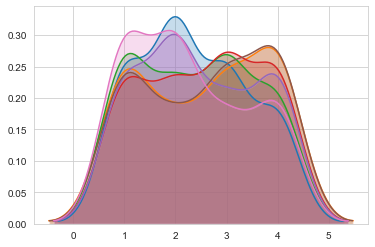

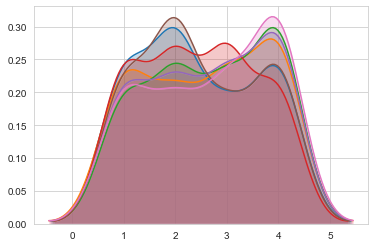

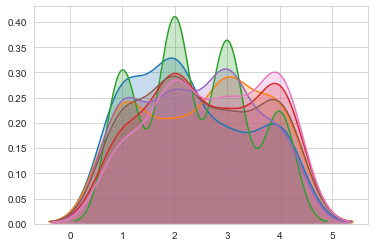

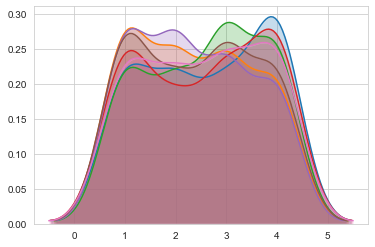

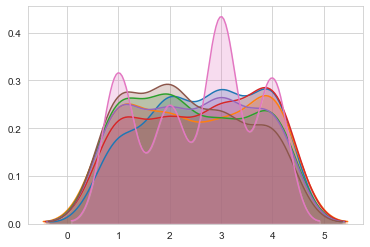

<Figure size 432x288 with 0 Axes>

In [42]:
# Set the palette using the name of a palette:
sns.set_palette("tab10")
for index, agent in enumerate(agentKeyStates): 
    for i in agent.keyNum.unique():
        g.fig.suptitle("Distribution of Actions over Key Situations " + agentKeyNames[index] + " " + str(i))
        g.set(xlabel=specialACT, ylabel="Percent of All Actions")
        p1=sns.kdeplot(agent[agent['keyNum']==i]['action'], shade=True, legend=False)
        
    plt.figure()

In [31]:
# section to make more dfs to prep for stacked area chart
# First make list to hold created DFs
actFear = pd.DataFrame()
actPP = pd.DataFrame()
actNormal = pd.DataFrame()
actStd = pd.DataFrame()
actionsDF_List = [actFear, actPP, actNormal,actStd]

# Now strip down DFs to just the actions
for index, agent in enumerate(agentList): 
    action_subset = pd.DataFrame(agent.pivot_table(index='epoch',columns='action_name',aggfunc=sum)['action'])
    action_subset['epoch'] = range(1, len(action_subset) + 1)
    action_subset.set_index('epoch',drop=False,inplace=True)
    action_subset
    actionsDF_List[index] = action_subset.drop(['epoch'], axis=1)


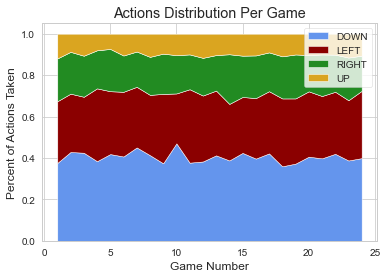

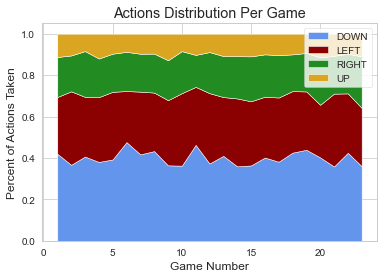

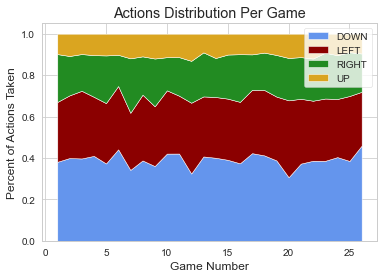

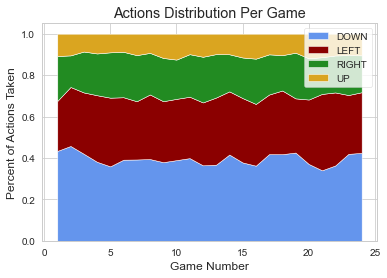

In [32]:
# Section to plot distribution of Actions across all data
outer_colors = ['cornflowerblue','darkred','forestgreen','goldenrod']
for index, agent in enumerate(actionsDF_List): 
    data_perc = agent.divide(agent.sum(axis=1), axis=0)
    data_perc
    plt.stackplot(range(1,len(agent)+1), data_perc['DOWN'], 
                  data_perc['LEFT'], 
                  data_perc['RIGHT'], 
                  data_perc['UP'], 
                  labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'], colors = outer_colors)
    plt.title('Actions Distribution Per Game')
    plt.xlabel('Game Number')
    plt.ylabel('Percent of Actions Taken')
    plt.legend(loc="best")
    # call savefig right before show
    # set up filename
    #filename = agentKeyNames[index] + "actionsGameDistribution.png"
    #savePath = os.path.join(folderList[index], filename)
    #plt.savefig(savePath, dpi=300, bbox_inches='tight')
    plt.show()

In [33]:
# section to make special DFs to hold actions only of key states
actFearKey = pd.DataFrame()
actPPKey = pd.DataFrame()
actNormalKey = pd.DataFrame()
actStdKey = pd.DataFrame()
actionsKeyDF_List = [actFearKey, actPPKey, actNormalKey,actStdKey]

# Now strip down DFs to just the actions
for index, agent in enumerate(agentKeyStates): 
    action_subset = pd.DataFrame(agent.pivot_table(index='epoch',columns='action_name',aggfunc=sum)['action'])
    action_subset['epoch'] = range(1, len(action_subset) + 1)
    action_subset.set_index('epoch',drop=False,inplace=True)
    action_subset
    actionsKeyDF_List[index] = action_subset.drop(['epoch'], axis=1)

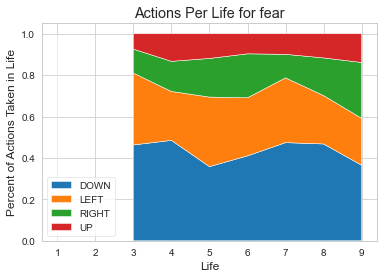

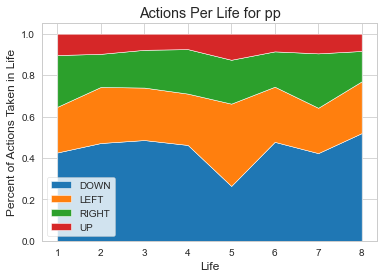

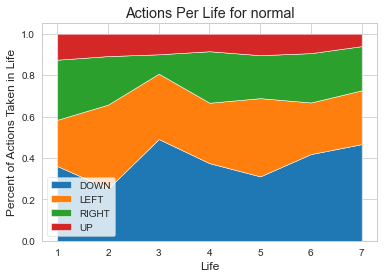

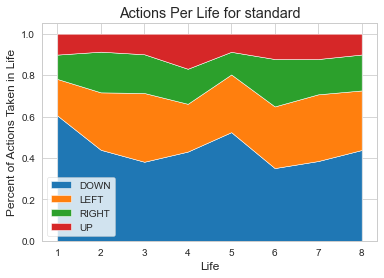

In [34]:
# section to plot distribution of actions across the key states only
for index, agent in enumerate(actionsKeyDF_List): 
    data_perc = agent.divide(agent.sum(axis=1), axis=0)
    data_perc
    plt.stackplot(range(1,len(agent)+1), data_perc['DOWN'], 
                  data_perc['LEFT'], 
                  data_perc['RIGHT'], 
                  data_perc['UP'], 
                  labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'])
    plt.title('Actions Per Life for ' + agentKeyNames[index])
    plt.xlabel('Life')
    plt.ylabel('Percent of Actions Taken in Life')
    plt.legend(loc="lower left")
    plt.show()

In [35]:
# section to experiment with highlighing the key states 
# First make list to hold created DFs with states instead of epochs
actFear = pd.DataFrame()
actPP = pd.DataFrame()
actNormal = pd.DataFrame()
actStd = pd.DataFrame()
actionsDF_List = [actFear, actPP, actNormal,actStd]

# Now strip down DFs to just the actions
for index, agent in enumerate(agentList): 
    action_subset = pd.DataFrame(agent.pivot_table(index='episode',columns='action_name',aggfunc=sum)['action'])
    action_subset['episode'] = range(1, len(action_subset) + 1)
    action_subset.set_index('episode',drop=False,inplace=True)
    action_subset
    actionsDF_List[index] = action_subset.drop(['episode'], axis=1)
    print(action_subset)


action_name  DOWN  LEFT  RIGHT  UP  episode
episode                                    
1             132    81     54  25        1
2              76    48     38  30        2
3              72    93     62  34        3
4             156    84     68  29        4
5             128   114     80  36        5
...           ...   ...    ...  ..      ...
67            124   102     62  34       67
68            164   135     84  56       68
69             96    51     58  24       69
70             40    45     18  25       70
71            148   108     62  25       71

[71 rows x 5 columns]
action_name  DOWN  LEFT  RIGHT  UP  episode
episode                                    
1              72    75     50  34        1
2             156    84     60  37        2
3             168    99     72  35        3
4              88   126     50  29        4
5             176   135     78  42        5
...           ...   ...    ...  ..      ...
64             96    99     48  34       64
65       

9
10
21
22
36
36
42
42
42
42
48
49
68
69


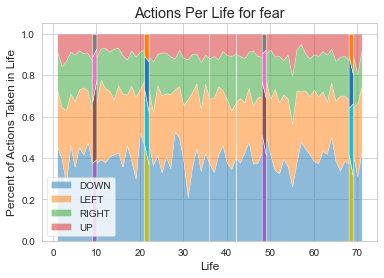

17
18
22
23
29
30
39
40
56
57
59
60
66
66


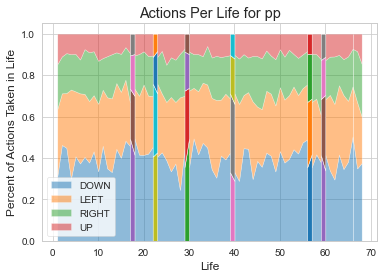

19
20
27
28
37
38
38
38
44
45
49
50
53
53


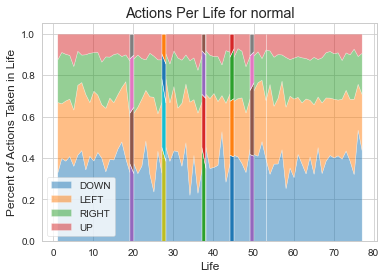

6
7
22
23
24
25
27
28
44
45
50
50
71
71


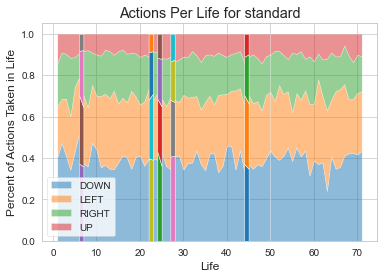

In [36]:
# for index, agent in enumerate(agentKeyStates):
#     # get first and last index of each key state
#     for i in agent.keyNum.unique():
#         firstIndex = agent[agent['keyNum']==i]['episode'].iloc[0] # first element 
#         print(firstIndex)
#         secondIndex = agent[agent['keyNum']==i]['episode'].iloc[-1] # last element 
#         print(secondIndex)
    
#     data_perc = actionsDF_List[index].divide(actionsDF_List[index].sum(axis=1), axis=0)
    
#     data_perc
#     plt.stackplot(range(1,len(agent)+1), data_perc['DOWN'], 
#                   data_perc['LEFT'], 
#                   data_perc['RIGHT'], 
#                   data_perc['UP'], 
#                   labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'], alpha = 0.5)
#    # plt.axvspan(firstIndex, secondIndex, alpha=1)
#     plt.title('Actions Per Life for ' + agentKeyNames[index])
#     plt.xlabel('Life')
#     plt.ylabel('Percent of Actions Taken in Life')
#     plt.legend(loc="lower left")
#     plt.show()

for index, agent in enumerate(actionsDF_List): 
    data_perc = agent.divide(agent.sum(axis=1), axis=0)
    data_perc
    plt.stackplot(range(1,len(agent)+1), data_perc['DOWN'], 
                  data_perc['LEFT'], 
                  data_perc['RIGHT'], 
                  data_perc['UP'], 
                  labels = ['DOWN', 'LEFT', 'RIGHT', 'UP'], alpha = 0.5)
    plt.title('Actions Per Life for ' + agentKeyNames[index])
    plt.xlabel('Life')
    plt.ylabel('Percent of Actions Taken in Life')
    plt.legend(loc="lower left")
    for i in agentKeyStates[index].keyNum.unique():
        firstIndex = agentKeyStates[index][agentKeyStates[index]['keyNum']==i]['episode'].iloc[0] # first element 
        print(firstIndex)
        secondIndex = agentKeyStates[index][agentKeyStates[index]['keyNum']==i]['episode'].iloc[-1] # last element 
        print(secondIndex)
        plt.stackplot(range(firstIndex, secondIndex+1), data_perc['DOWN'][firstIndex: secondIndex+1], 
                  data_perc['LEFT'][firstIndex: secondIndex+1], 
                  data_perc['RIGHT'][firstIndex: secondIndex+1], 
                  data_perc['UP'][firstIndex: secondIndex+1])

    plt.show()

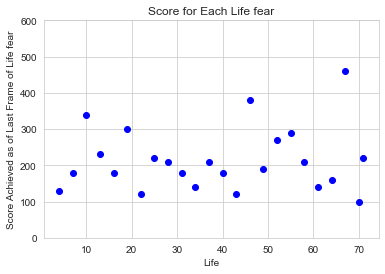

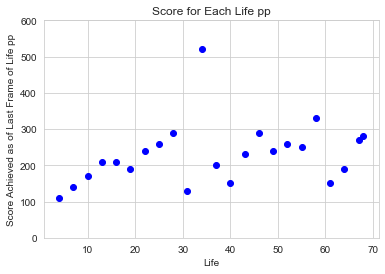

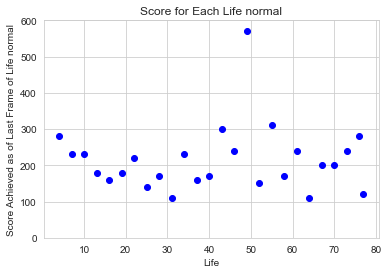

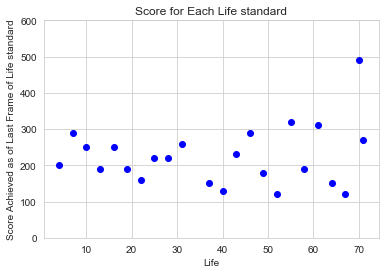

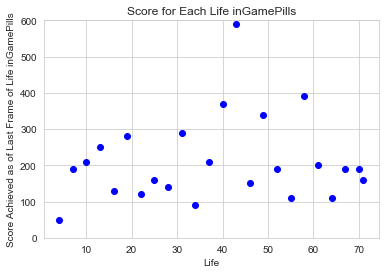

In [40]:
# Section to grab the end of episode scores and plot them 
for index, agent in enumerate(agentList):
    temp = agent[agent['epoch_score'] != 0]
    plt.plot(temp['episode'],temp['epoch_score'], 'o', c='b')
    plt.title('Score for Each Life ' + agentKeyNames[index])
    plt.xlabel('Life')
    plt.ylabel('Score Achieved as of Last Frame of Life ' + agentKeyNames[index])
    plt.ylim(0,600)
    # call savefig right before show
    # set up filename
    #filename = agentKeyNames[index] + "ActualFinalScores.png"
    #savePath = os.path.join(folderList[index], filename)
    #plt.savefig(savePath, dpi=300, bbox_inches='tight')
    plt.show()
    

In [51]:
dfFear.head(1)

action_name  action  reward  episode reward  epoch reward  total reward  \
0       RIGHT       2     0.0            10.0          10.0          10.0   

   lives  end of episode  end of epoch  episode  ...  action 4 total sum  \
0      3           False         False        1  ...                   2   

                                          q_values_x  \
0  [ -8.024829    4.922936    4.4790664   5.01505...   

                                         observation  \
0  [[[[  0   0   0]\n   [  0   0   0]\n   [  0   ...   

                                              argmax  \
0  [[[0.00000000e+00 0.00000000e+00 0.00000000e+0...   

                                          q_values_y  importance  \
0  [ -9.428471    5.7676315   5.33387     5.72093...    0.046693   

                                            features  epoch_score  key_state  \
0  [0.34509804 0.34509804 0.34509804 0.34509804 0...            0      False   

   context_state  
0          False  

[1 rows x 34 columns]

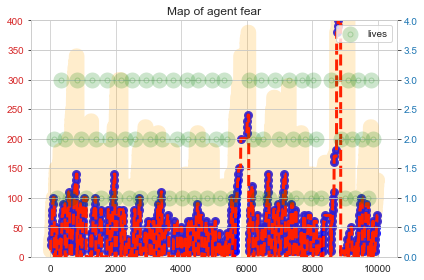

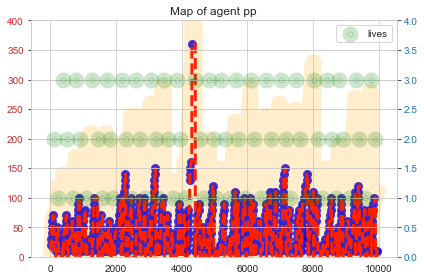

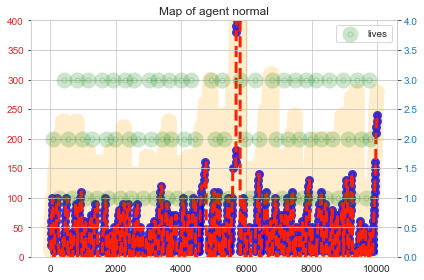

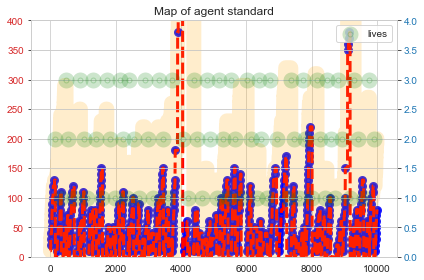

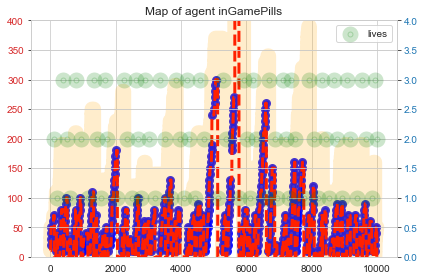

In [55]:
sns.set_style("whitegrid")
for index, agent in enumerate(agentList):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot("state", "episode reward", data = agent, c='red', linewidth=3, linestyle='--', label = 'rewards this life')
    ax1.plot("state", "epoch reward", data = agent, c='orange', linewidth=15, alpha = 0.2, label = 'rewards this game')
    ax1.scatter("state", "episode reward", data = agent[agent['reward']>0], c='blue', linewidth=3, alpha = 0.9)
    ax1.set_ylim(0,400)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    
    ax2.scatter("state", "lives", data = agent[agent['end of episode']==True], c='green', linewidth=10, alpha = 0.2)
    ax2.set_ylim(0,4)
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title("Map of agent " + agentKeyNames[index])
    plt.xlabel('Frame Number')
    
    plt.legend(loc="best")
    # call savefig right before show
    # set up filename
    #filename = agentKeyNames[index] + "SubwayMapSitch" + str(i) + ".png"
    #savePath = os.path.join(folderList[index], filename)
    #plt.savefig(savePath, dpi=300, bbox_inches='tight')
    fig.tight_layout()
    plt.show()

In [39]:
agentList[0].columns

Index(['action_name', 'action', 'reward', 'episode reward', 'epoch reward',
       'total reward', 'lives', 'end of episode', 'end of epoch', 'episode',
       'episode step', 'epoch', 'epoch step', 'state', 'mean reward',
       'action 0 episode sum', 'action 0 total sum', 'action 1 episode sum',
       'action 1 total sum', 'action 2 episode sum', 'action 2 total sum',
       'action 3 episode sum', 'action 3 total sum', 'action 4 episode sum',
       'action 4 total sum', 'q_values_x', 'observation', 'argmax',
       'q_values_y', 'importance', 'features', 'epoch_score', 'key_state',
       'context_state'],
      dtype='object')

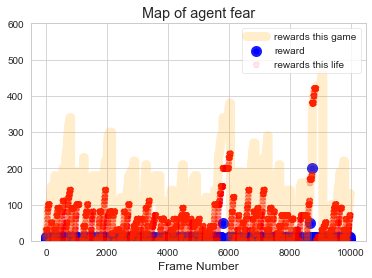

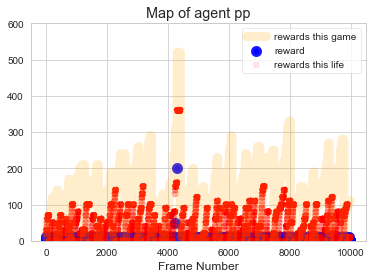

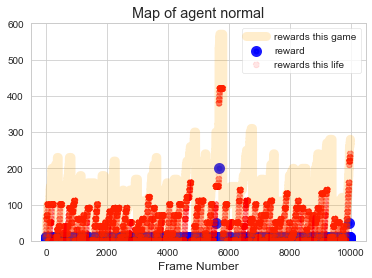

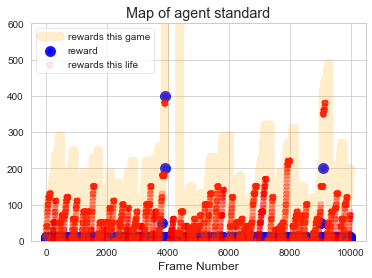

In [40]:
sns.set_style("whitegrid")
for index, agent in enumerate(agentList):
        plt.scatter("state", "reward", data = agent, c='blue', linewidth=5, alpha = 0.9)
        plt.scatter("state", "episode reward", data = agent, c='red', linewidth=1, alpha=0.1, linestyle='--', label = 'rewards this life')
        plt.plot("state", "epoch reward", data = agent, c='orange', linewidth=9, alpha = 0.2, label = 'rewards this game')
        plt.title("Map of agent " + agentKeyNames[index])
        plt.xlabel('Frame Number')
        plt.ylim(0,600)
        plt.legend(loc="best")
        # call savefig right before show
        # set up filename
        #filename = agentKeyNames[index] + "SubwayMapSitch" + str(i) + ".png"
        #savePath = os.path.join(folderList[index], filename)
        #plt.savefig(savePath, dpi=300, bbox_inches='tight')
        plt.show()
        agent.columns